# Importing common libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stats
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import scipy as scipy
import plotly.express as px

from scipy.stats.mstats import winsorize
import scipy.stats as stats
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,explained_variance_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve)

from statsmodels.tools.eval_measures import mse, rmse
from sklearn import preprocessing

## df3 House Construction C.I Ireland 

In [2]:
df3=pd.read_csv("national_house_construction_cost_index_0.csv")

In [3]:
df3.head()

Unnamed: 0 NATIONAL HOUSE CONSTRUCTION COST INDEX Unnamed: 2  \
0  Base: January 1991 = 100                                    NaN        NaN   
1                     Month                                   1994       1995   
2                   January                                  109.2      113.5   
3                  February                                  109.3      114.1   
4                     March                                  109.4      114.1   

  Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1       1996       1997       1998       1999       2000       2001   
2      115.9        118      122.9      126.3      135.8      154.3   
3      115.7      118.5      123.1      126.4      136.1      154.7   
4      115.9      118.8      123.8      126.5      136.4      155.6   

  Unnamed: 9  ... Unnamed: 14 Unnamed: 15 Unnamed: 16 Unnamed: 17 Unnamed: 18  \
0        NaN  ...         NaN         NaN         NaN         NaN         NaN   
1       2002  ...        2007        2008        2009        2010        2011   
2      169.9  ...       198.8       207.4         208       206.9       210.2   
3        170  ...       198.8       208.2       207.3       207.2       210.5   
4      169.5  ...       199.4       208.6       206.8       207.3       200.7   

  Unnamed: 19 Unnamed: 20 Unnamed: 21 Unnamed: 22 Unnamed: 23  
0         NaN         NaN         NaN         NaN         NaN  
1        2012        2013        2014        2015      2016.0  
2       202.5       204.1       204.9       206.2       207.4  
3       202.6       204.2       205.4         206       207.1  
4       202.7       204.3       205.4       206.5         NaN  

[5 rows x 24 columns]

In [4]:
#Setting the first row of the table to column 2.

df3=pd.read_csv("national_house_construction_cost_index_0.csv", header=2)

In [5]:
df3.head()

Month   1994   1995   1996   1997   1998   1999   2000   2001   2002  \
0   January  109.2  113.5  115.9    118  122.9  126.3  135.8  154.3  169.9   
1  February  109.3  114.1  115.7  118.5  123.1  126.4  136.1  154.7    170   
2     March  109.4  114.1  115.9  118.8  123.8  126.5  136.4  155.6  169.5   
3     April  110.3  114.1  115.9  119.8  123.8  130.5  136.5  157.4  169.5   
4       May  110.1  114.1  115.9  119.8  124.5  130.5  136.8  157.6  169.5   

   ...   2007   2008   2009   2010   2011   2012   2013   2014   2015   2016  
0  ...  198.8  207.4    208  206.9  210.2  202.5  204.1  204.9  206.2  207.4  
1  ...  198.8  208.2  207.3  207.2  210.5  202.6  204.2  205.4    206  207.1  
2  ...  199.4  208.6  206.8  207.3  200.7  202.7  204.3  205.4  206.5    NaN  
3  ...    200  208.9  206.5  207.9    201  203.4  204.5  205.6  206.8    NaN  
4  ...  200.1  209.4  206.5  208.7  201.2  203.6  204.5  205.9  207.2    NaN  

[5 rows x 24 columns]

In [6]:
df3.columns

Index(['Month', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016'],
      dtype='object')

In [7]:
df3_new = pd.melt(df3, id_vars='Month', var_name='Year', value_name='Value')

In [8]:
df3_new

Month  Year  Value
0                        January  1994  109.2
1                       February  1994  109.3
2                          March  1994  109.4
3                          April  1994  110.3
4                            May  1994  110.1
..                           ...   ...    ...
317                      October  2016    NaN
318                     November  2016    NaN
319                     December  2016    NaN
320               Yearly average  2016    NaN
321  % Increase on previous year  2016    NaN

[322 rows x 3 columns]

In [9]:
df3.dtypes

Month     object
1994      object
1995      object
1996      object
1997      object
1998      object
1999      object
2000      object
2001      object
2002      object
2003      object
2004      object
2005      object
2006      object
2007      object
2008      object
2009      object
2010      object
2011      object
2012      object
2013      object
2014      object
2015      object
2016     float64
dtype: object

In [10]:
df3_transposed = df3.set_index('Month').T

In [11]:
df3_transposed

Month January February  March  April    May   June   July August September  \
1994    109.2    109.3  109.4  110.3  110.1  110.6  110.7  110.9     112.2   
1995    113.5    114.1  114.1  114.1  114.1  114.1  114.5  114.5     115.7   
1996    115.9    115.7  115.9  115.9  115.9    116    116    116     116.9   
1997      118    118.5  118.8  119.8  119.8  119.9  120.8    121     121.5   
1998    122.9    123.1  123.8  123.8  124.5  124.5  125.7  125.7       126   
1999    126.3    126.4  126.5  130.5  130.5  130.5  131.5  131.5     134.1   
2000    135.8    136.1  136.4  136.5  136.8  136.9  137.2  137.2     137.7   
2001    154.3    154.7  155.6  157.4  157.6  157.7  161.1  165.9       166   
2002    169.9      170  169.5  169.5  169.5  169.7  173.8  173.9     173.9   
2003    174.2    174.5  174.5  177.3  177.3  177.4  177.1  177.2     177.2   
2004    179.6    179.7  179.9  179.9    180  180.2  181.1  182.2     182.2   
2005    184.7    184.8  184.9  186.5  186.6  186.6  186.7  186.9     186.9   
2006    189.9    190.1  190.6    194  194.2  194.3  194.4  194.5     194.6   
2007    198.8    198.8  199.4    200  200.1  200.3  203.7  203.6     203.7   
2008    207.4    208.2  208.6  208.9  209.4  209.9  210.4  210.4     210.5   
2009      208    207.3  206.8  206.5  206.5    206    206    206     206.1   
2010    206.9    207.2  207.3  207.9  208.7  208.6  209.4  209.6     209.5   
2011    210.2    210.5  200.7    201  201.2  201.4  201.5  201.9     202.1   
2012    202.5    202.6  202.7  203.4  203.6  203.6  204.1  204.1     203.7   
2013    204.1    204.2  204.3  204.5  204.5  204.8  204.8    205     205.1   
2014    204.9    205.4  205.4  205.6  205.9    206    206  206.6     206.4   
2015    206.2      206  206.5  206.8  207.2  207.6  207.4  207.4     207.3   
2016    207.4    207.1    NaN    NaN    NaN    NaN    NaN    NaN       NaN   

Month October November December Yearly average % Increase on previous year  
1994    112.7    112.9    113.1            111                       3.40%  
1995    115.8    115.9    115.9          114.7                       3.30%  
1996    117.1    117.2    117.2          116.3                       1.40%  
1997      122    122.6    122.6          120.4                       3.50%  
1998    126.2    126.2    126.1          124.9                       3.70%  
1999    134.7    134.8    134.9            131                       4.90%  
2000    153.8    153.8    153.9            141                       7.60%  
2001    169.3    169.4    169.3          161.5                      14.50%  
2002    173.9      174    174.1          171.8                       6.40%  
2003    177.2    177.2    177.2          176.5                       2.70%  
2004    183.9    184.2    184.2          181.5                       2.80%  
2005    189.5    189.4    189.7          186.9                       3.00%  
2006    197.7      198    198.1          194.2                       3.90%  
2007    203.8    203.8    204.2          201.7                       3.90%  
2008    210.1    209.9    209.3          209.4                       3.80%  
2009    206.2    206.2    206.2          206.5                      -1.40%  
2010    209.5    209.5    209.8          208.7                       1.10%  
2011      202    202.2    202.3          203.1                      -2.70%  
2012    203.8      204    204.2          203.5                       0.20%  
2013    205.4    205.4    204.7          204.7                       0.60%  
2014    206.7    206.5    206.2            206                       0.60%  
2015    207.2    207.6    207.4          207.1                       0.50%  
2016      NaN      NaN      NaN            NaN                         NaN

In [12]:
#Number of NaN values for 2016. Data only present for January. Drop the row

df3_transposed=df3_transposed.drop(["2016"], axis=0)

In [13]:
df3_transposed.reset_index(inplace=True)

In [14]:
df3_new = df3_transposed.iloc[:,: -2]

# Use the melt function to reshape the DataFrame
df3_new = pd.melt(df3_transposed, id_vars='index', var_name='Month', value_name='Value', value_vars=df3_transposed.columns[:-2])

# Rename the columns
df3_new.rename(columns={'index': 'Year'}, inplace=True)

# Sort the DataFrame by Year and Month
df3_new.sort_values(['Year', 'Month'], inplace=True)

In [15]:
df3_new

Year      Month  Value
66   1994      April  110.3
154  1994     August  110.9
242  1994   December  113.1
22   1994   February  109.3
0    1994    January  109.2
..    ...        ...    ...
65   2015      March  206.5
109  2015        May  207.2
241  2015   November  207.6
219  2015    October  207.2
197  2015  September  207.3

[264 rows x 3 columns]

In [16]:
df3_new['Statistic Label'] = 'House Construction Cost Index'

df3_new.rename(columns={'Value':'VALUE'}, inplace=True)

In [17]:
df3_new

Year      Month  VALUE                Statistic Label
66   1994      April  110.3  House Construction Cost Index
154  1994     August  110.9  House Construction Cost Index
242  1994   December  113.1  House Construction Cost Index
22   1994   February  109.3  House Construction Cost Index
0    1994    January  109.2  House Construction Cost Index
..    ...        ...    ...                            ...
65   2015      March  206.5  House Construction Cost Index
109  2015        May  207.2  House Construction Cost Index
241  2015   November  207.6  House Construction Cost Index
219  2015    October  207.2  House Construction Cost Index
197  2015  September  207.3  House Construction Cost Index

[264 rows x 4 columns]

## df4 Residential Property Price Index Ireland 

In [18]:
df4=pd.read_csv("Residential_Prop_Price_Index.csv")

In [19]:
df4.head()

Statistic Label         Month  \
0  Residential Property Price Index  2005 January   
1  Residential Property Price Index  2005 January   
2  Residential Property Price Index  2005 January   
3  Residential Property Price Index  2005 January   
4  Residential Property Price Index  2005 January   

            Type of Residential Property           UNIT  VALUE  
0  National - all residential properties  Base 2015=100  124.9  
1                      National - houses  Base 2015=100  120.7  
2                  National - apartments  Base 2015=100  153.4  
3    Dublin - all residential properties  Base 2015=100  118.5  
4                        Dublin - houses  Base 2015=100  112.0

Just want the values for National. Do not want the individual areas as results in unnecessary complication.

In [20]:
df4=df4.rename(columns={"Type of Residential Property": "Type_of_Residential_Property"})

In [21]:
df4

Statistic Label          Month  \
0                       Residential Property Price Index   2005 January   
1                       Residential Property Price Index   2005 January   
2                       Residential Property Price Index   2005 January   
3                       Residential Property Price Index   2005 January   
4                       Residential Property Price Index   2005 January   
...                                                  ...            ...   
17435  Percentage Change over 12 months for Residenti...  2023 February   
17436  Percentage Change over 12 months for Residenti...  2023 February   
17437  Percentage Change over 12 months for Residenti...  2023 February   
17438  Percentage Change over 12 months for Residenti...  2023 February   
17439  Percentage Change over 12 months for Residenti...  2023 February   

                Type_of_Residential_Property           UNIT  VALUE  
0      National - all residential properties  Base 2015=100  124.9  
1                          National - houses  Base 2015=100  120.7  
2                      National - apartments  Base 2015=100  153.4  
3        Dublin - all residential properties  Base 2015=100  118.5  
4                            Dublin - houses  Base 2015=100  112.0  
...                                      ...            ...    ...  
17435                          West - houses              %    8.1  
17436                      Mid-East - houses              %    6.7  
17437                      Mid-West - houses              %    4.9  
17438                    South-East - houses              %    5.7  
17439                    South-West - houses              %    6.4  

[17440 rows x 5 columns]

In [22]:
keep = ["National -"]

# Drop rows that do not contain any of the strings in 'keep'
# .strip() removes whitespace
df4 = df4[df4['Type_of_Residential_Property'].str.strip().str.contains('|'.join(keep))]

##Ref - https://www.geeksforgeeks.org/how-to-drop-rows-that-contain-a-specific-string-in-pandas/

In [23]:
df4.head()

Statistic Label          Month  \
0   Residential Property Price Index   2005 January   
1   Residential Property Price Index   2005 January   
2   Residential Property Price Index   2005 January   
20  Residential Property Price Index  2005 February   
21  Residential Property Price Index  2005 February   

             Type_of_Residential_Property           UNIT  VALUE  
0   National - all residential properties  Base 2015=100  124.9  
1                       National - houses  Base 2015=100  120.7  
2                   National - apartments  Base 2015=100  153.4  
20  National - all residential properties  Base 2015=100  125.9  
21                      National - houses  Base 2015=100  121.8

In [24]:
df4label = df4.groupby(by=['Statistic Label']).size()
print(df4label)

Statistic Label
Percentage Change over 1 month for Residential Property Price Index      654
Percentage Change over 12 months for Residential Property Price Index    654
Percentage Change over 3 months for Residential Property Price Index     654
Residential Property Price Index                                         654
dtype: int64


Only interested in the Residential Property Price Index for the purpose of this assignment. 

In [25]:
df4_filt = df4[df4['Statistic Label'] == 'Residential Property Price Index']

In [26]:
df4_filt.head()

Statistic Label          Month  \
0   Residential Property Price Index   2005 January   
1   Residential Property Price Index   2005 January   
2   Residential Property Price Index   2005 January   
20  Residential Property Price Index  2005 February   
21  Residential Property Price Index  2005 February   

             Type_of_Residential_Property           UNIT  VALUE  
0   National - all residential properties  Base 2015=100  124.9  
1                       National - houses  Base 2015=100  120.7  
2                   National - apartments  Base 2015=100  153.4  
20  National - all residential properties  Base 2015=100  125.9  
21                      National - houses  Base 2015=100  121.8

In [27]:
df4_filt.dtypes

Statistic Label                  object
Month                            object
Type_of_Residential_Property     object
UNIT                             object
VALUE                           float64
dtype: object

In [28]:
date = df4_filt['Month'].str.split(pat = ' ', n = 1, expand = True)

In [29]:
date = date.rename(columns={' 0': 'Year', ' 1': 'Month'})

In [30]:
date

0         1
0     2005   January
1     2005   January
2     2005   January
20    2005  February
21    2005  February
...    ...       ...
4321  2023   January
4322  2023   January
4340  2023  February
4341  2023  February
4342  2023  February

[654 rows x 2 columns]

In [31]:
df4_filt.head()

Statistic Label          Month  \
0   Residential Property Price Index   2005 January   
1   Residential Property Price Index   2005 January   
2   Residential Property Price Index   2005 January   
20  Residential Property Price Index  2005 February   
21  Residential Property Price Index  2005 February   

             Type_of_Residential_Property           UNIT  VALUE  
0   National - all residential properties  Base 2015=100  124.9  
1                       National - houses  Base 2015=100  120.7  
2                   National - apartments  Base 2015=100  153.4  
20  National - all residential properties  Base 2015=100  125.9  
21                      National - houses  Base 2015=100  121.8

In [32]:
df4_filt = df4_filt.drop('Month', axis=1)

In [33]:
df4_filt.insert(loc = 3, column = 'Year', value = date[0])


df4_filt.insert(loc = 4, column = 'Month', value = date[1])

In [34]:
df4_filt.columns

Index(['Statistic Label', 'Type_of_Residential_Property', 'UNIT', 'Year',
       'Month', 'VALUE'],
      dtype='object')

In [35]:
df4_filt 

Statistic Label           Type_of_Residential_Property  \
0     Residential Property Price Index  National - all residential properties   
1     Residential Property Price Index                      National - houses   
2     Residential Property Price Index                  National - apartments   
20    Residential Property Price Index  National - all residential properties   
21    Residential Property Price Index                      National - houses   
...                                ...                                    ...   
4321  Residential Property Price Index                      National - houses   
4322  Residential Property Price Index                  National - apartments   
4340  Residential Property Price Index  National - all residential properties   
4341  Residential Property Price Index                      National - houses   
4342  Residential Property Price Index                  National - apartments   

               UNIT  Year     Month  VALUE  
0     Base 2015=100  2005   January  124.9  
1     Base 2015=100  2005   January  120.7  
2     Base 2015=100  2005   January  153.4  
20    Base 2015=100  2005  February  125.9  
21    Base 2015=100  2005  February  121.8  
...             ...   ...       ...    ...  
4321  Base 2015=100  2023   January  168.2  
4322  Base 2015=100  2023   January  166.6  
4340  Base 2015=100  2023  February  167.1  
4341  Base 2015=100  2023  February  167.5  
4342  Base 2015=100  2023  February  166.9  

[654 rows x 6 columns]

## df3 & df4 Combined

In [36]:
combined = pd.concat([df3_new,df4_filt])

In [37]:
combined

Year     Month  VALUE                   Statistic Label  \
66    1994     April  110.3     House Construction Cost Index   
154   1994    August  110.9     House Construction Cost Index   
242   1994  December  113.1     House Construction Cost Index   
22    1994  February  109.3     House Construction Cost Index   
0     1994   January  109.2     House Construction Cost Index   
...    ...       ...    ...                               ...   
4321  2023   January  168.2  Residential Property Price Index   
4322  2023   January  166.6  Residential Property Price Index   
4340  2023  February  167.1  Residential Property Price Index   
4341  2023  February  167.5  Residential Property Price Index   
4342  2023  February  166.9  Residential Property Price Index   

               Type_of_Residential_Property           UNIT  
66                                      NaN            NaN  
154                                     NaN            NaN  
242                                     NaN            NaN  
22                                      NaN            NaN  
0                                       NaN            NaN  
...                                     ...            ...  
4321                      National - houses  Base 2015=100  
4322                  National - apartments  Base 2015=100  
4340  National - all residential properties  Base 2015=100  
4341                      National - houses  Base 2015=100  
4342                  National - apartments  Base 2015=100  

[918 rows x 6 columns]

In [38]:
combined=combined.drop(['Type_of_Residential_Property','UNIT'], axis =1)

In [39]:
combined

Year     Month  VALUE                   Statistic Label
66    1994     April  110.3     House Construction Cost Index
154   1994    August  110.9     House Construction Cost Index
242   1994  December  113.1     House Construction Cost Index
22    1994  February  109.3     House Construction Cost Index
0     1994   January  109.2     House Construction Cost Index
...    ...       ...    ...                               ...
4321  2023   January  168.2  Residential Property Price Index
4322  2023   January  166.6  Residential Property Price Index
4340  2023  February  167.1  Residential Property Price Index
4341  2023  February  167.5  Residential Property Price Index
4342  2023  February  166.9  Residential Property Price Index

[918 rows x 4 columns]

In [40]:
combined.dtypes

Year               object
Month              object
VALUE              object
Statistic Label    object
dtype: object

In [41]:
combined[["VALUE","Year"]] = combined[["VALUE","Year"]].apply(lambda x:pd.to_numeric(x, errors='coerce'))

In [42]:
combined.dtypes

Year                 int64
Month               object
VALUE              float64
Statistic Label     object
dtype: object

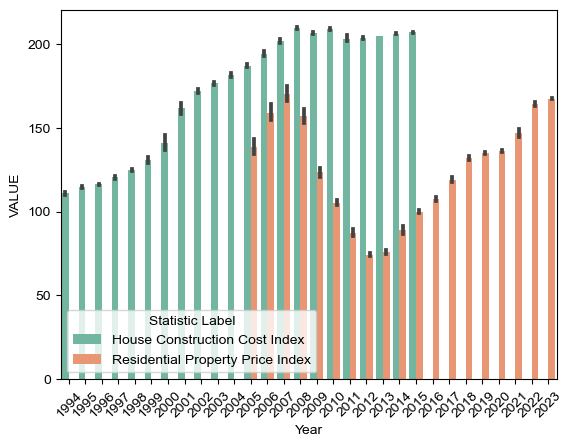

In [43]:
sns.set_palette("Set2")

sns.barplot(data=combined, x='Year', y='VALUE', hue='Statistic Label')
sns.set(rc={'figure.figsize':(12,10),'axes.labelsize': 18,'xtick.labelsize': 16, 'ytick.labelsize': 16})
plt.xticks(rotation=45);

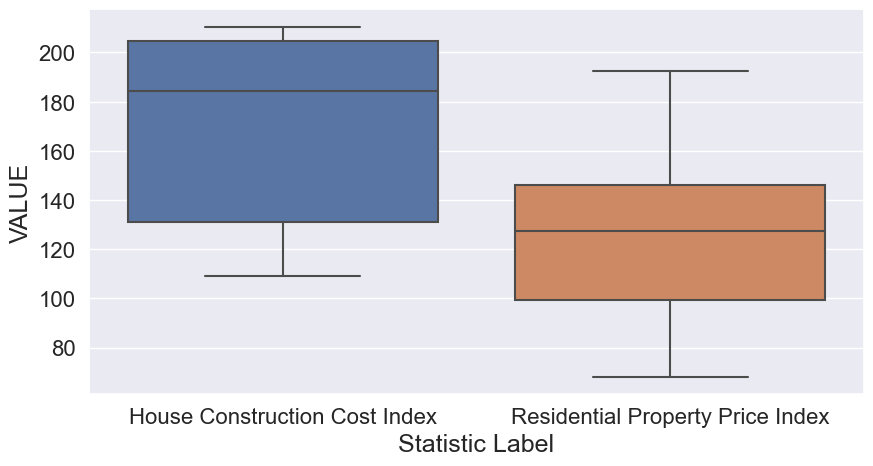

In [44]:
plt.figure(figsize=(10,5))  
sns.boxplot(x='Statistic Label', y='VALUE',data=combined)
plt.show()

In [45]:
merged = pd.merge(df3_new,df4_filt, on=["Year","Month"], how="left")

In [46]:
merged

Year      Month VALUE_x              Statistic Label_x  \
0    1994      April   110.3  House Construction Cost Index   
1    1994     August   110.9  House Construction Cost Index   
2    1994   December   113.1  House Construction Cost Index   
3    1994   February   109.3  House Construction Cost Index   
4    1994    January   109.2  House Construction Cost Index   
..    ...        ...     ...                            ...   
523  2015    October   207.2  House Construction Cost Index   
524  2015    October   207.2  House Construction Cost Index   
525  2015  September   207.3  House Construction Cost Index   
526  2015  September   207.3  House Construction Cost Index   
527  2015  September   207.3  House Construction Cost Index   

                    Statistic Label_y           Type_of_Residential_Property  \
0                                 NaN                                    NaN   
1                                 NaN                                    NaN   
2                                 NaN                                    NaN   
3                                 NaN                                    NaN   
4                                 NaN                                    NaN   
..                                ...                                    ...   
523  Residential Property Price Index                      National - houses   
524  Residential Property Price Index                  National - apartments   
525  Residential Property Price Index  National - all residential properties   
526  Residential Property Price Index                      National - houses   
527  Residential Property Price Index                  National - apartments   

              UNIT  VALUE_y  
0              NaN      NaN  
1              NaN      NaN  
2              NaN      NaN  
3              NaN      NaN  
4              NaN      NaN  
..             ...      ...  
523  Base 2015=100    103.2  
524  Base 2015=100    103.3  
525  Base 2015=100    102.4  
526  Base 2015=100    102.2  
527  Base 2015=100    101.6  

[528 rows x 8 columns]

In [47]:
merged = merged.rename(columns={'VALUE_x': 'Construction_Cost_Index', 'VALUE_y': 'Property_Price_Index'})

merged = merged.drop(['Statistic Label_x', 'UNIT', 'Statistic Label_y', 'Type_of_Residential_Property'], axis=1)

In [48]:
merged[["Year","Construction_Cost_Index"]]=merged[["Year","Construction_Cost_Index"]].apply(pd.to_numeric)

In [49]:
merged.head()

Year     Month  Construction_Cost_Index  Property_Price_Index
0  1994     April                    110.3                   NaN
1  1994    August                    110.9                   NaN
2  1994  December                    113.1                   NaN
3  1994  February                    109.3                   NaN
4  1994   January                    109.2                   NaN

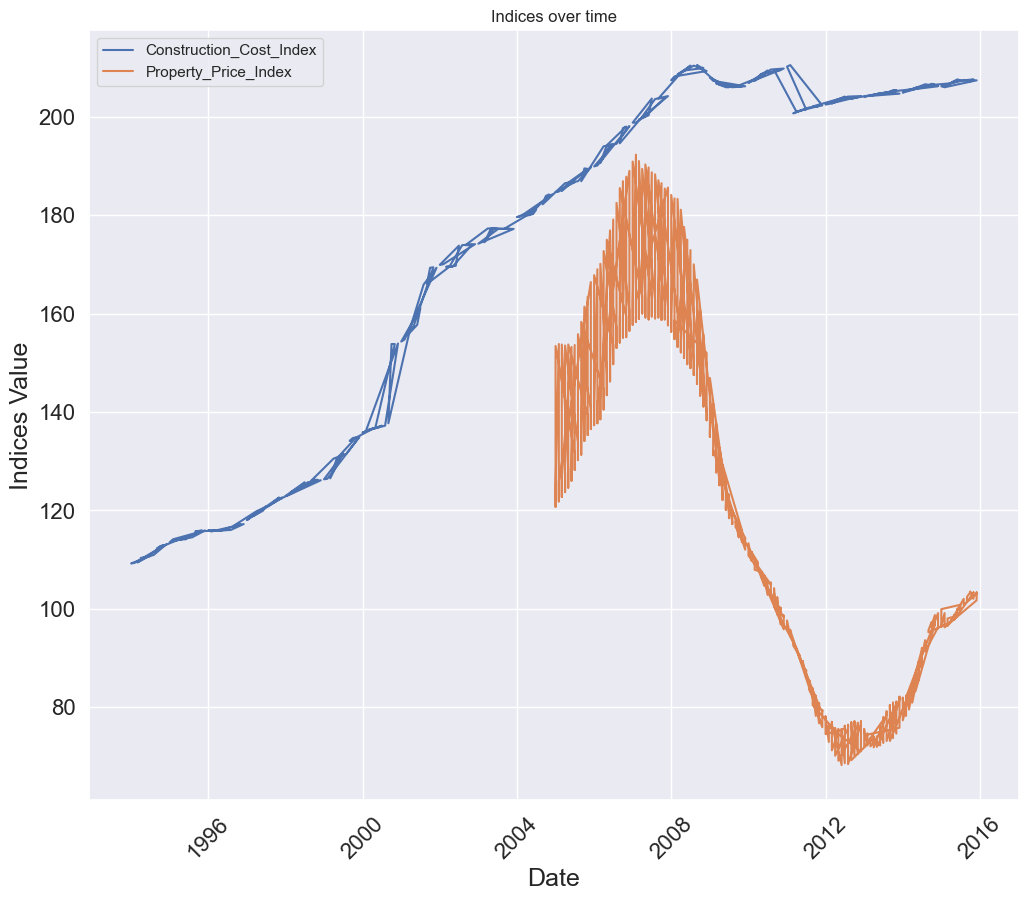

In [50]:
#For the purpose of visualisation, want the year and month to show as date times.
merged['Date'] = pd.to_datetime(merged['Year'].astype(str) + '-' + merged['Month'], format='%Y-%B')

# Plotting the index data against the datetime column using plt
plt.plot(merged['Date'], merged['Construction_Cost_Index'], label='Construction_Cost_Index')
plt.plot(merged['Date'], merged['Property_Price_Index'], label='Property_Price_Index')

plt.xlabel('Date')
plt.ylabel('Indices Value')
plt.title('Indices over time')
plt.legend()
plt.xticks(rotation=45);

/Users/seankearney/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/seankearney/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


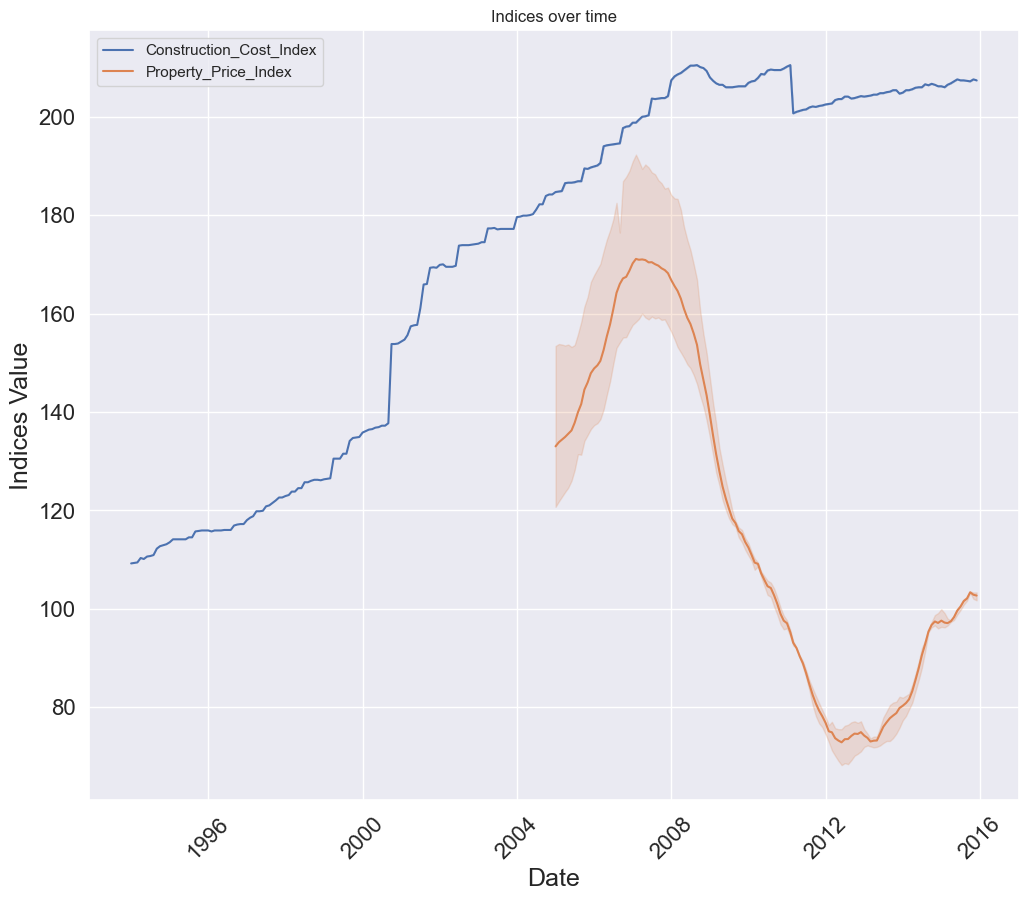

In [51]:
#For the purpose of visualisation, want the year and month to show as date times.
merged['Date'] = pd.to_datetime(merged['Year'].astype(str) + '-' + merged['Month'], format='%Y-%B')

# Plotting the index data against the datetime column using seaborn
sns.lineplot(merged['Date'], merged['Construction_Cost_Index'], label='Construction_Cost_Index')
sns.lineplot(merged['Date'], merged['Property_Price_Index'], label='Property_Price_Index')

plt.xlabel('Date')
plt.ylabel('Indices Value')
plt.title('Indices over time')
plt.legend()
plt.xticks(rotation=45);

In [52]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528 entries, 0 to 527
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Year                     528 non-null    int64         
 1   Month                    528 non-null    object        
 2   Construction_Cost_Index  528 non-null    float64       
 3   Property_Price_Index     396 non-null    float64       
 4   Date                     528 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 24.8+ KB


In [53]:
corr = merged.corr()

<AxesSubplot:>

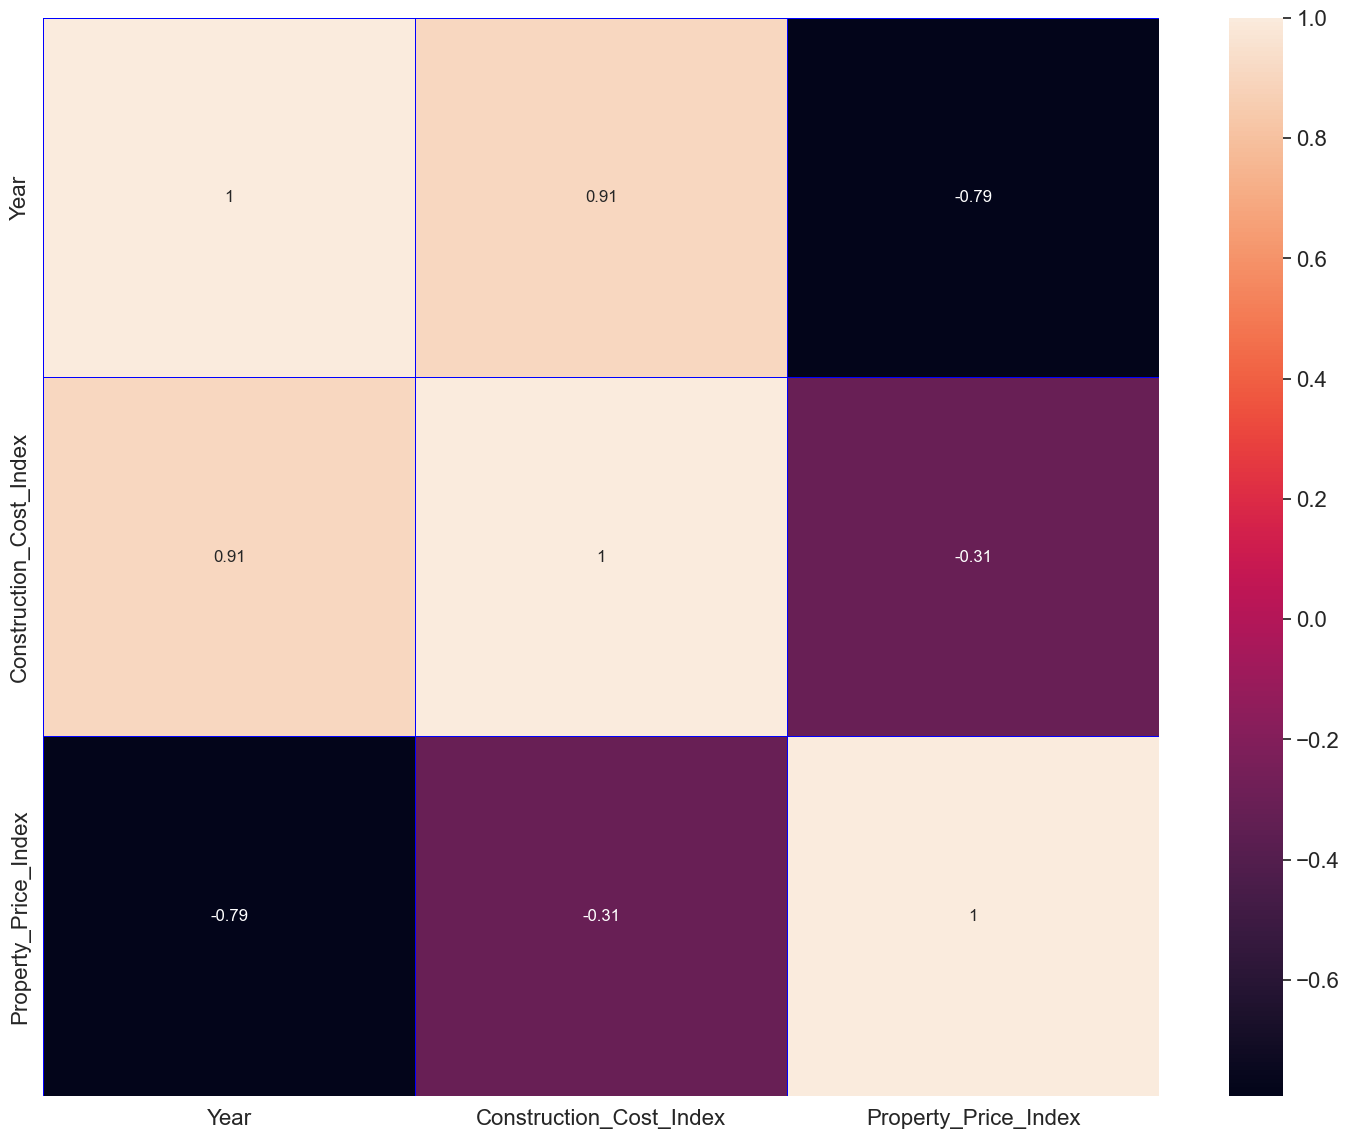

In [54]:
plt.figure(figsize=(18,14))
sns.heatmap(corr,annot=True,linecolor="blue",lw=0.5)

In [55]:
merged.isnull().sum()

Year                         0
Month                        0
Construction_Cost_Index      0
Property_Price_Index       132
Date                         0
dtype: int64

In [56]:
merged.dropna(axis=0, inplace=True)

## df5 Construction Indices 

In [57]:
df5=pd.read_csv("download1061915290288055378.csv")

In [58]:
df5.head()

FeatureCode  DateCode Measurement  Units  Value     Construction indices
0   K02000001  2011 Feb       Costs    NaN  103.1              New Housing
1   K02000001  2011 Feb       Costs    NaN  104.4                 All work
2   K02000001  2011 Feb       Costs    NaN  105.0           Other new work
3   K02000001  2011 Feb       Costs    NaN  103.7  Repairs and maintenance
4   K02000001  2016 Aug       Costs    NaN  110.1              New Housing

In [59]:
df5 = df5.drop(["FeatureCode","Measurement","Units"], axis=1)

In [60]:
df5.head()

DateCode  Value     Construction indices
0  2011 Feb  103.1              New Housing
1  2011 Feb  104.4                 All work
2  2011 Feb  105.0           Other new work
3  2011 Feb  103.7  Repairs and maintenance
4  2016 Aug  110.1              New Housing

In [61]:
df5.dtypes

DateCode                 object
Value                   float64
Construction indices     object
dtype: object

In [62]:
df5.sort_values(by=["DateCode"], inplace=True)

In [63]:
df5

DateCode  Value        Construction indices
466   2000 Q1  102.4  Index of hourly wage costs
152   2000 Q2   98.1  Index of hourly wage costs
90    2000 Q3   99.8  Index of hourly wage costs
351   2000 Q4   99.8  Index of hourly wage costs
201   2001 Q1  110.4  Index of hourly wage costs
..        ...    ...                         ...
383  2019 May  123.1                 New Housing
373  2019 May  124.1              Other new work
372  2019 May  123.2     Repairs and maintenance
370  2019 May  122.7                    All work
452   2019 Q1  175.5  Index of hourly wage costs

[493 rows x 3 columns]

In [64]:
df5.drop(df5[df5['Construction indices'] == 'Index of hourly wage costs'].index, inplace=True)

In [65]:
#As the date code in in Quarters as a string in some columns
#Need to split. 

#df5['DateCode']= df5['DateCode'].str.split(' ').str[0].astype(int)

#Insert Ref

In [66]:
df5['DateCode'] = pd.to_datetime(df5['DateCode'])
df5['DateCode'] = df5['DateCode'].dt.strftime('%Y-%m')

In [67]:
df5

DateCode  Value     Construction indices
366  2010-12  101.4                 All work
365  2010-12  102.0              New Housing
364  2010-12  102.2  Repairs and maintenance
363  2010-12  101.3           Other new work
83   2010-11  102.5  Repairs and maintenance
..       ...    ...                      ...
282  2019-03  123.8              New Housing
383  2019-05  123.1              New Housing
373  2019-05  124.1           Other new work
372  2019-05  123.2  Repairs and maintenance
370  2019-05  122.7                 All work

[416 rows x 3 columns]

In [68]:
df5_pivot = df5.pivot(index='DateCode', columns='Construction indices', values='Value')

In [69]:
df5_pivot = df5_pivot.reset_index()

In [70]:
df5_pivot

Construction indices DateCode  All work  New Housing  Other new work  \
0                     2010-11     101.7        102.3           101.3   
1                     2010-12     101.4        102.0           101.3   
2                     2011-01     103.1        102.2           103.5   
3                     2011-02     104.4        103.1           105.0   
4                     2011-03     105.6        103.7           106.5   
..                        ...       ...          ...             ...   
99                    2019-02     122.6        122.7           124.3   
100                   2019-03     123.2        123.8           124.7   
101                   2019-04     123.2        123.5           124.8   
102                   2019-05     122.7        123.1           124.1   
103                   2019-06     123.1        123.7           124.6   

Construction indices  Repairs and maintenance  
0                                       102.5  
1                                       102.2  
2                                       102.6  
3                                       103.7  
4                                       104.4  
..                                        ...  
99                                      122.7  
100                                     123.5  
101                                     123.4  
102                                     123.2  
103                                     123.3  

[104 rows x 5 columns]

In [71]:
#Need to respecify date time format after pivotting

df5_pivot['DateCode'] = pd.to_datetime(df5_pivot['DateCode'], format='%Y-%m')

## df6 Index of Employment in Construction 

In [72]:
df6=pd.read_csv("BBA02.20230428105548.csv")

In [73]:
df6.head()

STATISTIC                                    Statistic Label C02196V02652  \
0     BBA02  Annual Average Index of Employment (1975 - Dat...            -   
1     BBA02  Annual Average Index of Employment (1975 - Dat...            -   
2     BBA02  Annual Average Index of Employment (1975 - Dat...            -   
3     BBA02  Annual Average Index of Employment (1975 - Dat...            -   
4     BBA02  Annual Average Index of Employment (1975 - Dat...            -   

   State  TLIST(A1)  Year           UNIT  VALUE  
0  State       1975  1975  Base 2000=100  133.2  
1  State       1976  1976  Base 2000=100  128.1  
2  State       1977  1977  Base 2000=100  134.8  
3  State       1978  1978  Base 2000=100  147.0  
4  State       1979  1979  Base 2000=100  158.8

In [74]:
df6 = df6.drop(["C02196V02652","TLIST(A1)","UNIT", "STATISTIC", "State","Statistic Label"], axis=1)

In [75]:
df6

Year  VALUE
0   1975  133.2
1   1976  128.1
2   1977  134.8
3   1978  147.0
4   1979  158.8
5   1980  156.1
6   1981  152.9
7   1982  135.6
8   1983  110.7
9   1984  101.1
10  1985   87.1
11  1986   75.7
12  1987   64.9
13  1988   60.5
14  1989   66.7
15  1990   72.2
16  1991   69.8
17  1992   68.4
18  1993   64.3
19  1994   65.9
20  1995   68.8
21  1996   74.4
22  1997   81.4
23  1998   88.5
24  1999   94.2
25  2000  100.0
26  2001  101.7
27  2002   99.3
28  2003   99.8
29  2004  103.2
30  2005  107.0
31  2006  109.6
32  2007  107.5
33  2008   90.7

In [76]:
df6.dtypes

Year       int64
VALUE    float64
dtype: object

<AxesSubplot:xlabel='Year', ylabel='VALUE'>

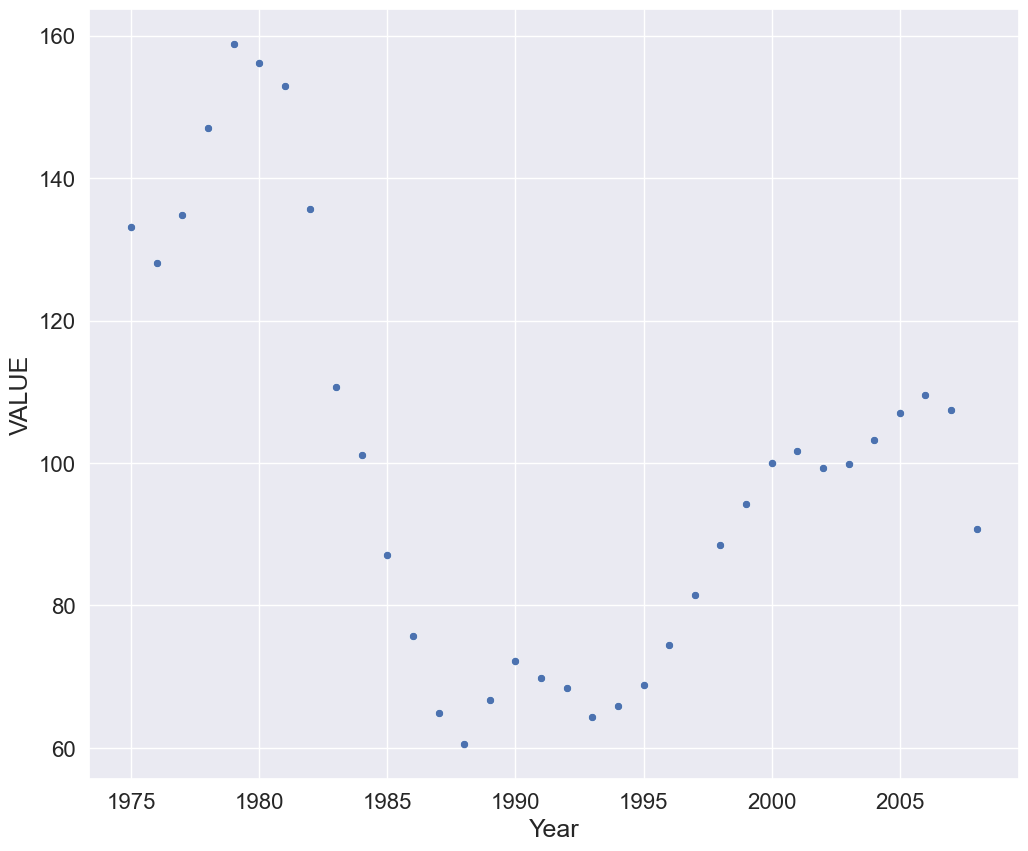

In [77]:
sns.scatterplot(x=df6['Year'],y=df6['VALUE'])

# Classification

In [78]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [79]:
#suppress any warnings
import warnings
warnings.filterwarnings('ignore') 

### Using Construction Cost/Property Price Index dataset ('merged')

In [80]:
merged

Year      Month  Construction_Cost_Index  Property_Price_Index       Date
132  2005      April                    186.5                 127.5 2005-04-01
133  2005      April                    186.5                 123.7 2005-04-01
134  2005      April                    186.5                 153.5 2005-04-01
135  2005     August                    186.9                 133.8 2005-08-01
136  2005     August                    186.9                 130.2 2005-08-01
..    ...        ...                      ...                   ...        ...
523  2015    October                    207.2                 103.2 2015-10-01
524  2015    October                    207.2                 103.3 2015-10-01
525  2015  September                    207.3                 102.4 2015-09-01
526  2015  September                    207.3                 102.2 2015-09-01
527  2015  September                    207.3                 101.6 2015-09-01

[396 rows x 5 columns]

In [81]:
merged=merged.drop('Date', axis=1)

In [82]:
merged.dtypes

Year                         int64
Month                       object
Construction_Cost_Index    float64
Property_Price_Index       float64
dtype: object

In [83]:
# Split the dataset into features (X) and target variable (y)
X = merged[['Construction_Cost_Index','Property_Price_Index']]
y = merged['Year']

# Split the dataset into training and testing. Taking 20% test size, 80% training size. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Transform using standard scaler.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Verify the sizes of the resulting splits
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")
#https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn

Training set size: 316
Testing set size: 80


In [84]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape
#Look at the shape of the test and train array.

((316, 2), (316,), (80, 2), (80,))

## KNN

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [86]:
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=14)

In [87]:
y_pred = knn.predict(X_test)

In [88]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9125


In [89]:
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

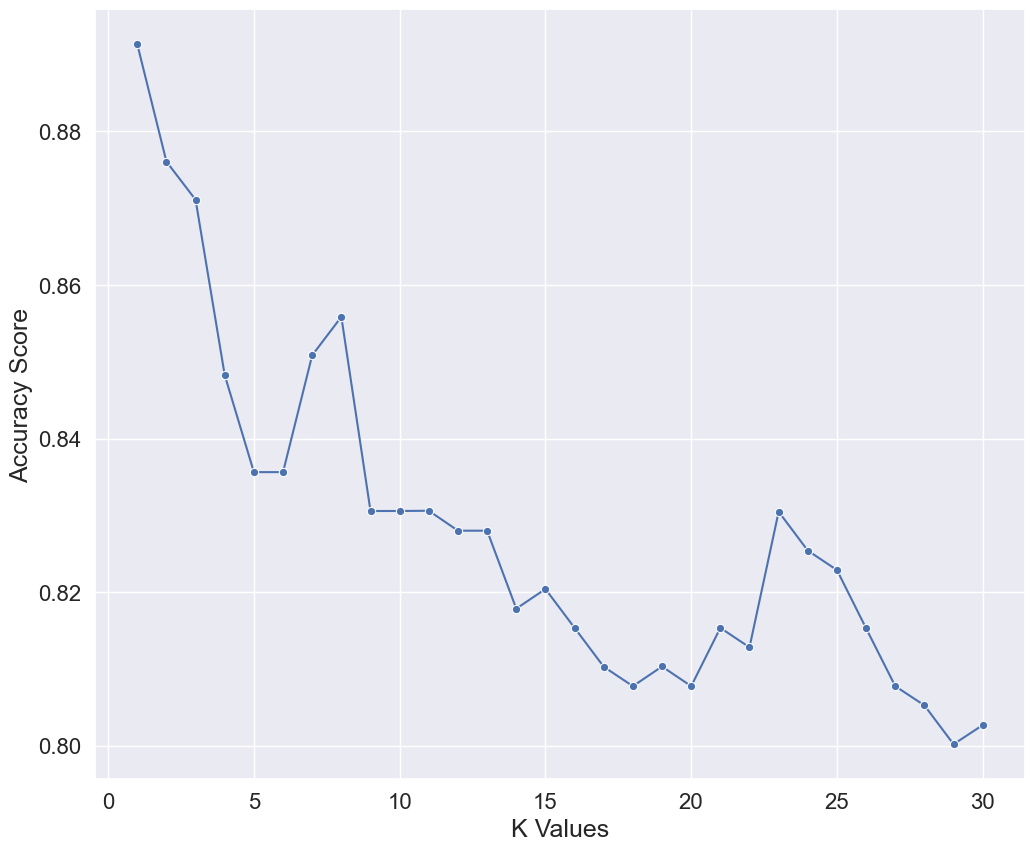

In [90]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
#https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn

In [91]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [92]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,  average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.975
Precision: 0.9696969696969698
Recall: 0.9696969696969698


In [93]:
neighbors = np.arange(1, 31)                  # number of neighbors
train_accuracy = np.zeros(len(neighbors))    # Declare and initialise the matrix
test_accuracy = np.zeros(len(neighbors))     # Declare and initialise the matrix

In [94]:
for i,k in enumerate(neighbors):                          # for loop that checks the model for neighbor values 1, 2, 3, ..., 9
    knn = KNeighborsClassifier(n_neighbors = k)           # Initialise an object knn using KNeighborsClassifier method

    #Fit the model
    knn.fit(X_train, y_train)                      # Call fit method to implement the ML KNeighborsClassifier model

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)   # Save the score value in the train_accuracy array

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)      # Save the score value in the train_accuracy array

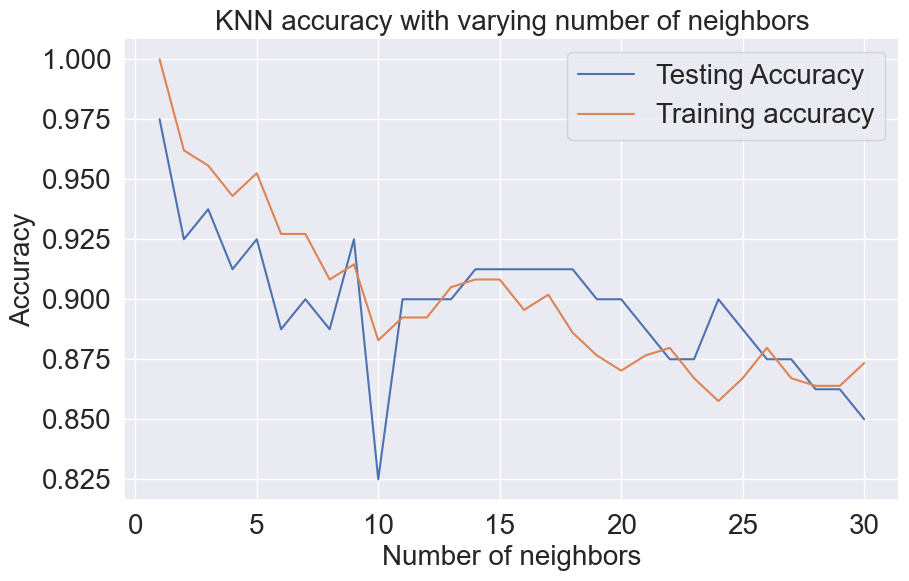

In [95]:
# Delcare the size of the array
plt.figure(figsize = (10, 6))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 20)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend(prop = {'size': 20})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [96]:
# Declare and initialise an object 'KNeighborsClassifier' with 4 neighbors
knn = KNeighborsClassifier(n_neighbors = 9)

# Fit the model
knn.fit(X_train, y_train)

# Compute accuracy on the training set
train_accuracy = knn.score(X_train, y_train)

# Compute accuracy on the test set
test_accuracy = knn.score(X_test, y_test)

In [97]:
# Display the test accuracy
print(test_accuracy)

0.925


In [98]:
# import library for confusion matrix
from sklearn.metrics import confusion_matrix

# Predict the results by calling a method 'predict()'
prediction = knn.predict(X_test)

# Display the confusion matrix
confusion_matrix(y_test, prediction)

array([[11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 10,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  6,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  7,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6]])

In [99]:
# Display the report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

        2005       0.85      1.00      0.92        11
        2006       0.86      0.75      0.80         8
        2007       1.00      0.91      0.95        11
        2008       0.90      1.00      0.95         9
        2009       1.00      0.86      0.92         7
        2010       1.00      1.00      1.00         6
        2011       1.00      1.00      1.00         3
        2012       1.00      1.00      1.00         7
        2013       0.86      1.00      0.92         6
        2014       1.00      0.67      0.80         6
        2015       0.86      1.00      0.92         6

    accuracy                           0.93        80
   macro avg       0.94      0.93      0.93        80
weighted avg       0.93      0.93      0.92        80



## Random Forest Classification

In [100]:
# Using 'Construction_Cost_Index: 2' and 'Property_Price_Index: 3' features into X
X = merged.iloc[:, [2, 3]].values

# Store the 'Year' feature into 'y'
y = merged.iloc[:, 0].values

# Display X and y
print(X, y)

[[186.5 127.5]
 [186.5 123.7]
 [186.5 153.5]
 [186.9 133.8]
 [186.9 130.2]
 [186.9 155.8]
 [189.7 140.7]
 [189.7 136.5]
 [189.7 166.4]
 [184.8 125.9]
 [184.8 121.8]
 [184.8 153.8]
 [184.7 124.9]
 [184.7 120.7]
 [184.7 153.4]
 [186.7 131.6]
 [186.7 128.2]
 [186.7 153.6]
 [186.6 129.5]
 [186.6 126. ]
 [186.6 153.2]
 [184.9 126.6]
 [184.9 122.7]
 [184.9 153.7]
 [186.6 128.4]
 [186.6 124.6]
 [186.6 153.7]
 [189.4 139.3]
 [189.4 135.3]
 [189.4 163.4]
 [189.5 138.1]
 [189.5 134.1]
 [189.5 161.4]
 [186.9 135.2]
 [186.9 131.3]
 [186.9 158.3]
 [194.  144.6]
 [194.  140.5]
 [194.  172.7]
 [194.5 157.1]
 [194.5 153. ]
 [194.5 182.5]
 [198.1 160.6]
 [198.1 156.5]
 [198.1 189. ]
 [190.1 141.7]
 [190.1 137.7]
 [190.1 169. ]
 [189.9 141.4]
 [189.9 137.3]
 [189.9 167.8]
 [194.4 153.7]
 [194.4 149.7]
 [194.4 179.1]
 [194.3 150.3]
 [194.3 146.2]
 [194.3 176.9]
 [190.6 142.5]
 [190.6 138.5]
 [190.6 170.1]
 [194.2 147.6]
 [194.2 143.4]
 [194.2 175. ]
 [198.  159.4]
 [198.  155.2]
 [198.  187.8]
 [197.7 15

In [101]:
# Load the library 'sklearn.tree'
from sklearn.tree import DecisionTreeClassifier

# Create and initialise a DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_features=2)

# Train the classifier by calling a method 'fit()'
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features=2, random_state=0)

In [102]:
# Calculate the predicted vlaue by calling a method predict()
y_pred = classifier.predict(X_test)

              precision    recall  f1-score   support

        2005       1.00      1.00      1.00        11
        2006       1.00      1.00      1.00         8
        2007       1.00      1.00      1.00        11
        2008       0.90      1.00      0.95         9
        2009       1.00      0.57      0.73         7
        2010       0.75      1.00      0.86         6
        2011       1.00      1.00      1.00         3
        2012       1.00      1.00      1.00         7
        2013       0.86      1.00      0.92         6
        2014       1.00      0.83      0.91         6
        2015       1.00      1.00      1.00         6

    accuracy                           0.95        80
   macro avg       0.96      0.95      0.94        80
weighted avg       0.96      0.95      0.95        80



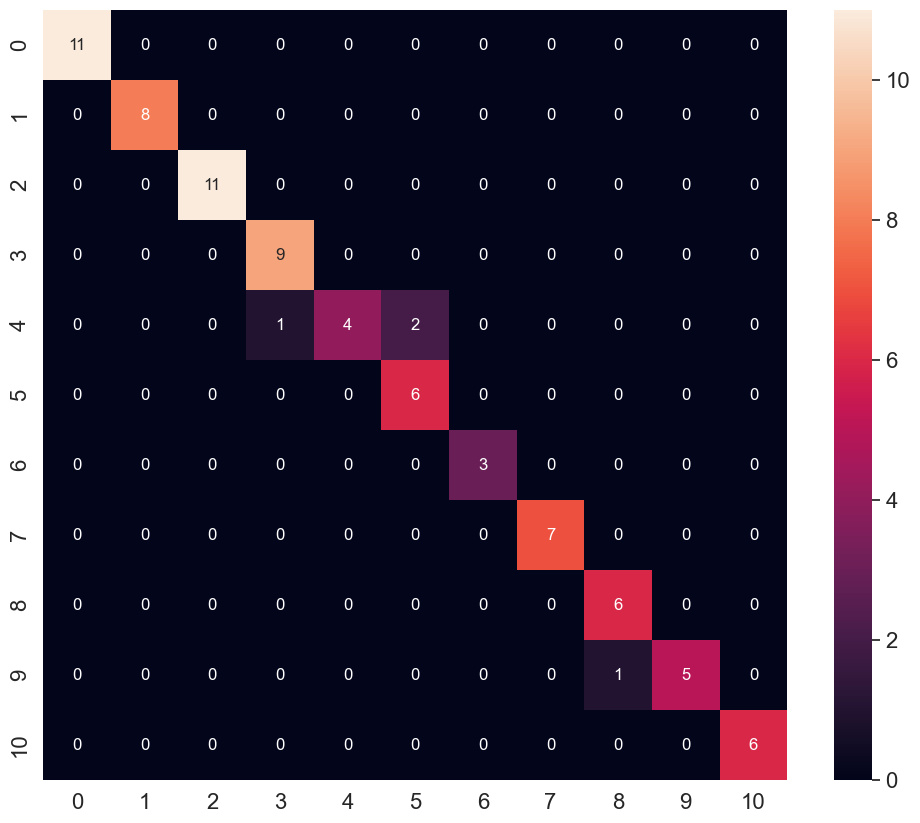

In [103]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

# print the classification_report based on y_test and y_predict
print(classification_report(y_test, y_pred))

In [104]:
from sklearn import metrics                           # Import scikit-learn metrics module for accuracy calculation

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.95


[Text(0.6212121212121212, 0.9666666666666667, 'X[1] <= -0.032\nentropy = 3.455\nsamples = 316\nvalue = [25, 28, 25, 27, 29, 30, 33, 29, 30, 30, 30]'),
 Text(0.3939393939393939, 0.9, 'X[1] <= -0.547\nentropy = 2.584\nsamples = 182\nvalue = [0, 0, 0, 0, 0, 30, 33, 29, 30, 30, 30]'),
 Text(0.15151515151515152, 0.8333333333333334, 'X[0] <= -0.118\nentropy = 1.988\nsamples = 112\nvalue = [0, 0, 0, 0, 0, 0, 31, 29, 30, 22, 0]'),
 Text(0.12121212121212122, 0.7666666666666667, 'entropy = 0.0\nsamples = 28\nvalue = [0, 0, 0, 0, 0, 0, 28, 0, 0, 0, 0]'),
 Text(0.18181818181818182, 0.7666666666666667, 'X[0] <= 0.175\nentropy = 1.738\nsamples = 84\nvalue = [0, 0, 0, 0, 0, 0, 3, 29, 30, 22, 0]'),
 Text(0.06060606060606061, 0.7, 'X[0] <= 0.143\nentropy = 0.661\nsamples = 35\nvalue = [0, 0, 0, 0, 0, 0, 0, 29, 6, 0, 0]'),
 Text(0.030303030303030304, 0.6333333333333333, 'entropy = 0.0\nsamples = 22\nvalue = [0, 0, 0, 0, 0, 0, 0, 22, 0, 0, 0]'),
 Text(0.09090909090909091, 0.6333333333333333, 'X[1] <= -1.

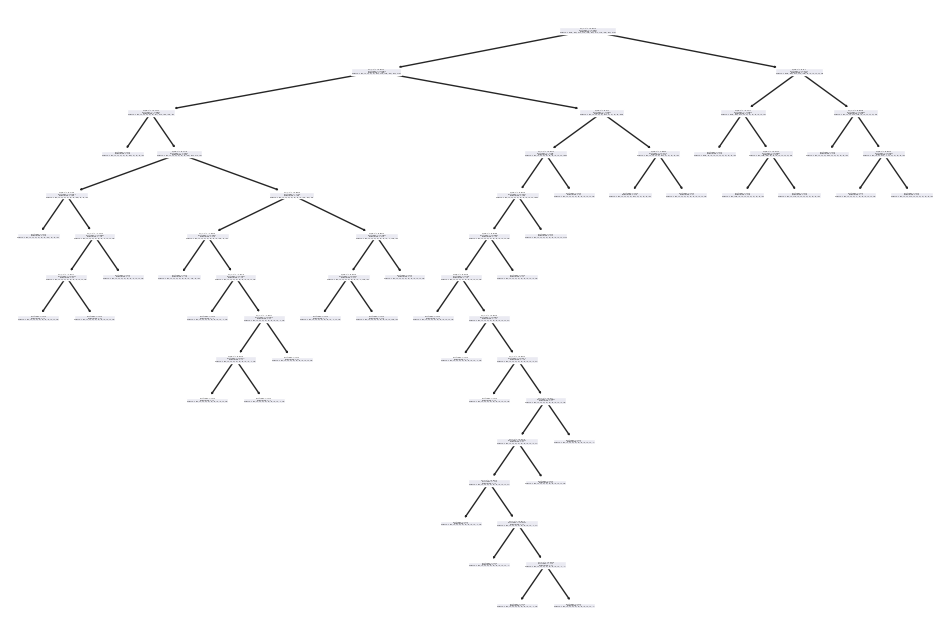

In [105]:
import matplotlib.pyplot as plt
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(classifier.fit(X_train, y_train))

## SVM Classification

In [106]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit the SVM model on the training data
svm = SVC(kernel='poly', C=10, random_state=42)
svm.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm.predict(X_test)

# Evaluate accuracy and other metrics
print('Accuracy:', accuracy_score(y_test, y_pred))

print('Classification report:', classification_report(y_test, y_pred))

Accuracy: 0.85
Classification report:               precision    recall  f1-score   support

        2005       1.00      1.00      1.00        11
        2006       0.80      1.00      0.89         8
        2007       1.00      0.82      0.90        11
        2008       0.90      1.00      0.95         9
        2009       1.00      0.86      0.92         7
        2010       0.83      0.83      0.83         6
        2011       1.00      0.67      0.80         3
        2012       1.00      0.71      0.83         7
        2013       0.57      0.67      0.62         6
        2014       0.60      0.50      0.55         6
        2015       0.67      1.00      0.80         6

    accuracy                           0.85        80
   macro avg       0.85      0.82      0.83        80
weighted avg       0.87      0.85      0.85        80



## Hyperparameter tuning GridSearchCV

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ................C=0.1, kernel=poly;, score=0.359 total time=   0.0s
[CV 2/5] END ................C=0.1, kernel=poly;, score=0.381 total time=   0.0s
[CV 3/5] END ................C=0.1, kernel=poly;, score=0.397 total time=   0.0s
[CV 4/5] END ................C=0.1, kernel=poly;, score=0.302 total time=   0.0s
[CV 5/5] END ................C=0.1, kernel=poly;, score=0.317 total time=   0.0s
[CV 1/5] END ..................C=1, kernel=poly;, score=0.672 total time=   0.0s
[CV 2/5] END ..................C=1, kernel=poly;, score=0.698 total time=   0.0s
[CV 3/5] END ..................C=1, kernel=poly;, score=0.730 total time=   0.0s
[CV 4/5] END ..................C=1, kernel=poly;, score=0.571 total time=   0.0s
[CV 5/5] END ..................C=1, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5] END .................C=10, kernel=poly;, score=0.750 total time=   0.0s
[CV 2/5] END .................C=10, kernel=poly;,

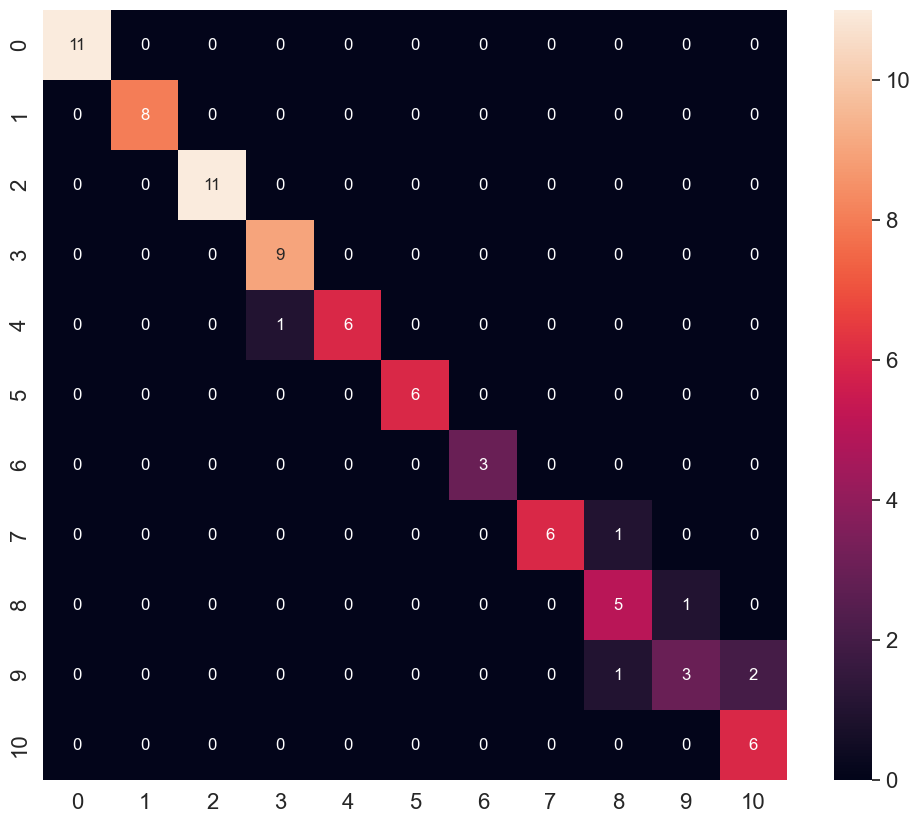

In [107]:
# find best hyper parameters
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

param_grid = {'C':[0.1, 1, 10, 100, 1000], 'kernel':['poly']}

grid = GridSearchCV(SVC(random_state = 42), param_grid, verbose = 4)
grid.fit(X_train, y_train)

# Find the best parameters for the model
grid.best_params_
grid.best_estimator_

# Predictions after getting best parameters
grid_predictions = grid.predict(X_test)
cmG = confusion_matrix(y_test, grid_predictions)

sns.heatmap(cmG, annot=True)
print(classification_report(y_test, grid_predictions))

print(grid.best_params_,grid.best_estimator_)

In [108]:
# Create an object svmModel using SVC()
svmModel = SVC(kernel = 'rbf',C = 100, gamma = 0.5)

# Train the model by calling fit()
svmModel.fit(X_train,y_train)

# Store the predicted values to y_pred
Y_pred = svmModel.predict(X_test)

# Display accuracy 
print('Accuracy in SVC:', accuracy_score(y_test, y_pred))

Accuracy in SVC: 0.85


Need to explain why rbf vs poly n- Revisit

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.719 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.810 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.762 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.810 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.219 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.222 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.190 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.206 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.222 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.094 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.841 total time=   0.0s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.937 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.952 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.875 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.810 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.921 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.825 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.889 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.875 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.841 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.905 total time=   0.0s
[CV 4/5] END ....C=1000, gam

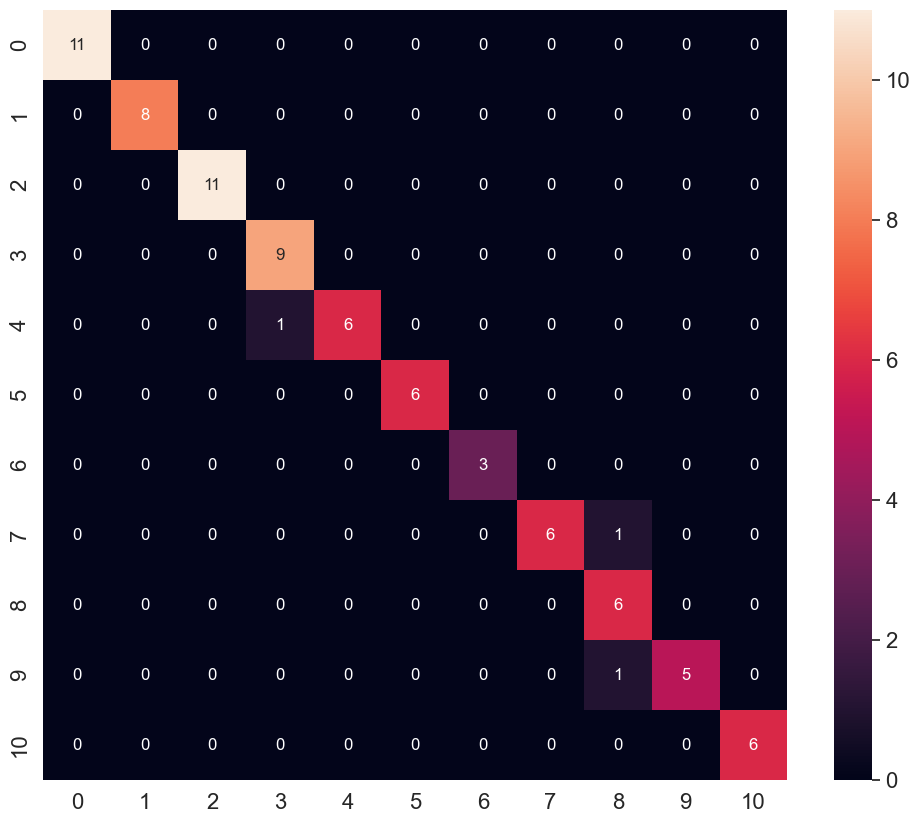

In [109]:
# Hyper parameter tuning.
param_grid = {'C':[0.1, 1, 10, 100, 1000], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001], 'kernel':['rbf']}

grid = GridSearchCV(SVC(random_state = 42), param_grid, verbose = 4)
grid.fit(X_train, y_train)

# Find the best parameters for the model
grid.best_params_
grid.best_estimator_

# Predictions after getting best parameters
grid_predictions = grid.predict(X_test)
cmG = confusion_matrix(y_test, grid_predictions)

sns.heatmap(cmG, annot=True)
print(classification_report(y_test, grid_predictions))

print(grid.best_params_,grid.best_estimator_)

Kernel RBF gives a better accuracy score.

## Regression

### Linear

In [110]:
# Create a class 'LinearRegressionGD'
class LinearRegressionGD(object):
    
    def __init__(self, eta = 0.001, n_iter = 20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [111]:
#Specify X and y.
X = merged[['Year']].values
y = merged[['Construction_Cost_Index']].values

In [112]:
X.shape, y.shape
#Look at the shape of the X and y variables. 

((396, 1), (396, 1))

In [113]:
# Import the StandardScaler library for normalization 
from sklearn.preprocessing import StandardScaler

# Initialise using StandardScaler 
sc_x = StandardScaler()
sc_y = StandardScaler()

# Train the objects using the function fit_transform()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

In [114]:
# Reshape the (85, 1) to (85,) array for Machine Learning model
y_std = np.reshape(y_std, 396)

# Display the number of rows and columns
X_std.shape, y_std.shape

((396, 1), (396,))

In [115]:
# Initialise previously created object (lr)
lr = LinearRegressionGD()

# Train the model by using fit() fucntion
lr.fit(X_std, y_std)

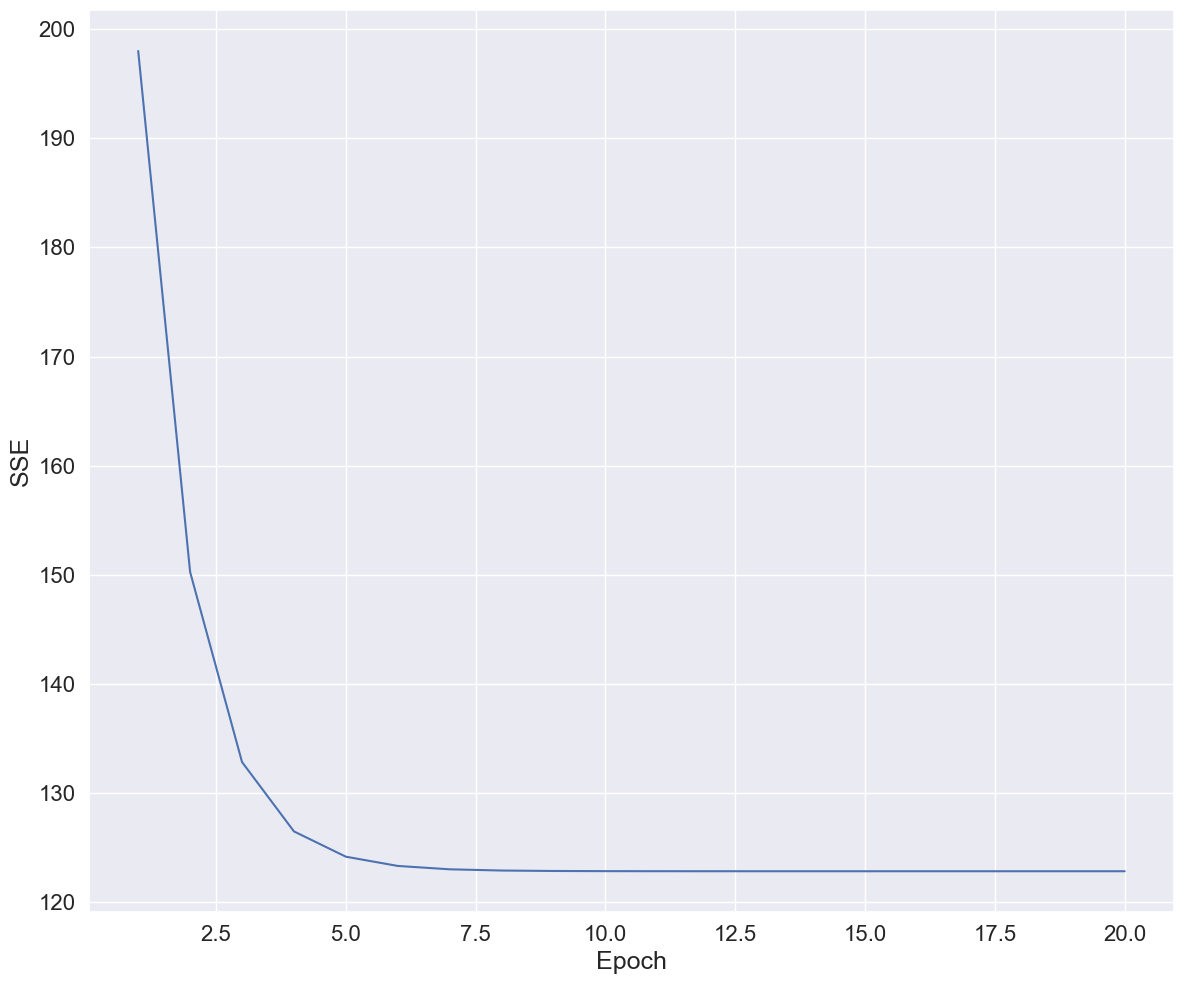

In [116]:
# Draw a plot using linear regression iterations and cost
plt.plot(range(1, lr.n_iter + 1), lr.cost_)
plt.ylabel('SSE')           
plt.xlabel('Epoch')          
                            
plt.tight_layout()
plt.show()

Epoch refers to the number of times the model runs the entire dataset. As can be seen from the above graph, the sum of square errors decreases.

In [117]:
# Construct Linear Regression plot
def lin_regplot(X, y, model):
    plt.scatter(X, y, c = 'blue')
    plt.plot(X, model.predict(X), color = 'red', linewidth = 2)    
    return

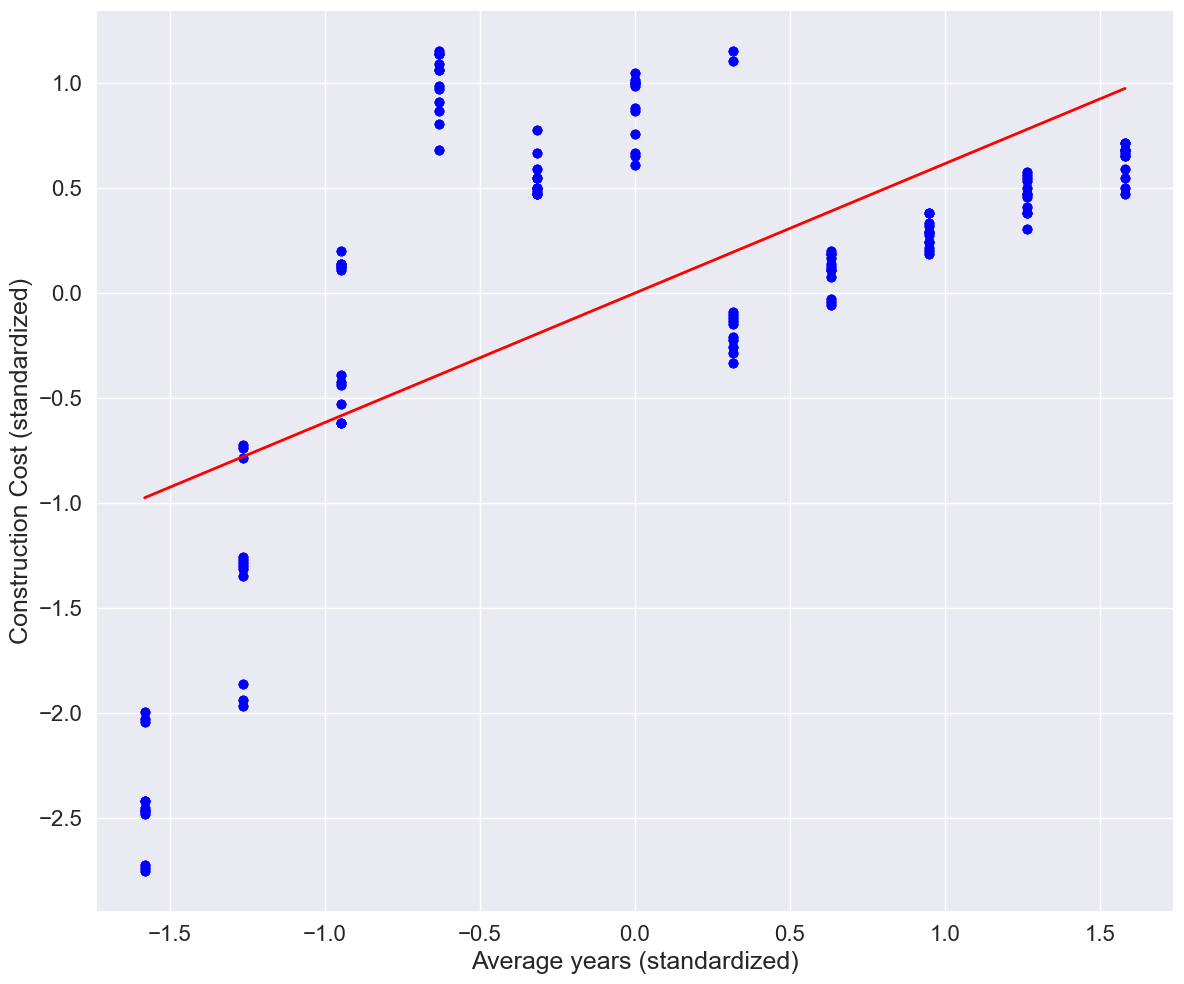

In [118]:
# Call the method lin_regplot()
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average years (standardized)')
plt.ylabel('Construction Cost (standardized)')
plt.tight_layout()
plt.show()

We can see from the above plot the standardized values are often significant distances from the line of best fit.

In [119]:
#Slope and intercept of the line
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Slope: 0.616
Intercept: 0.000


### RANSAC Regression

In [120]:
# import LinearRegression from sklearn library
from sklearn.linear_model import LinearRegression

# Initialise an object named as 'slr' by calling a method LinearRegression()
slr = LinearRegression()

# Train the model
slr.fit(X, y)

# Predict the results
y_pred = slr.predict(X)

# Display the Slope and Intercept values
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 1.287
Intercept: -2384.838


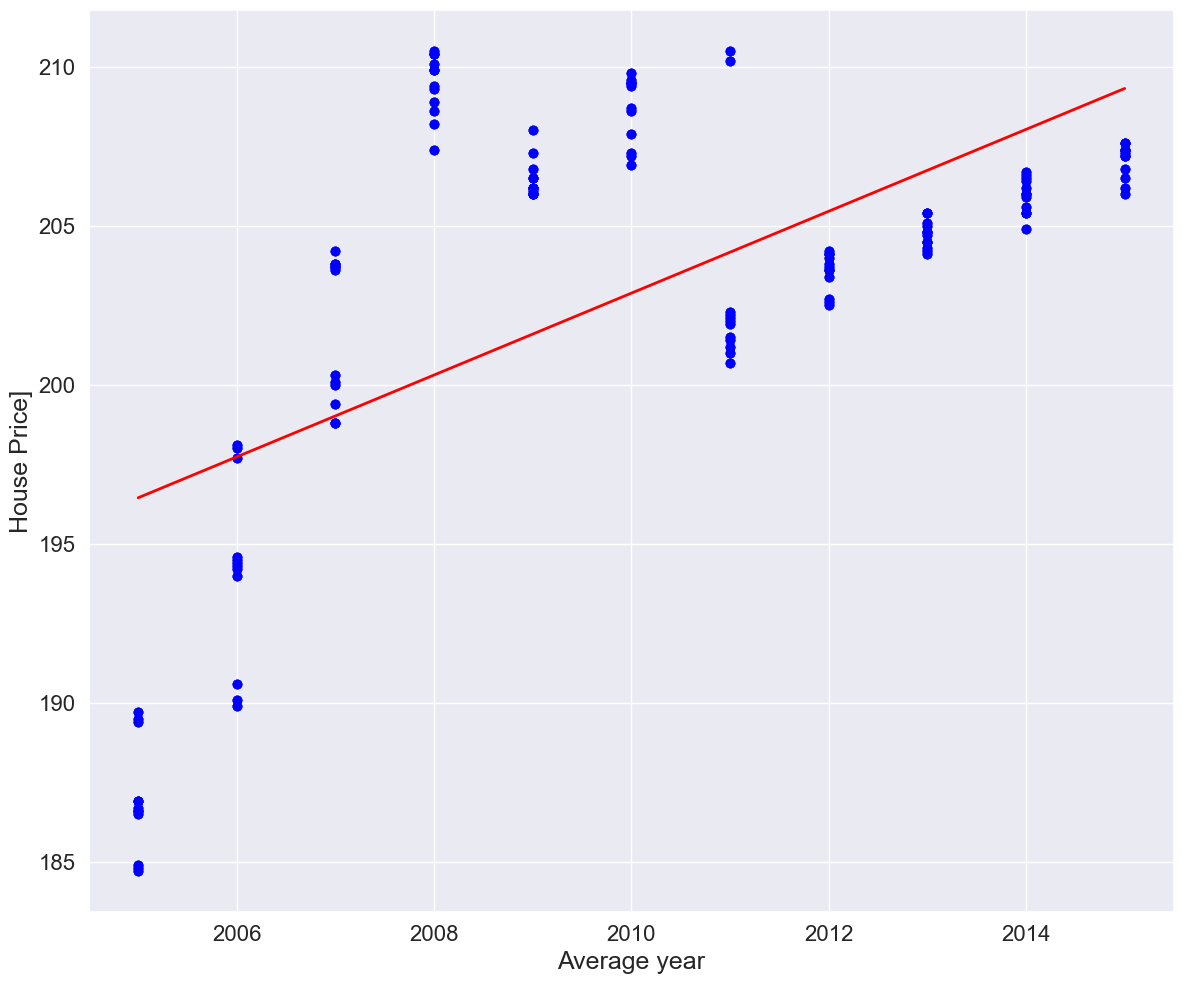

In [121]:
# Display the regression plot using lin_regplot() method
lin_regplot(X, y, slr)
plt.xlabel('Average year')
plt.ylabel('House Price]')
plt.tight_layout()
plt.show()

In [122]:
# Initialise an object slr by calling a method named as 'LinearRegression()'
slr = LinearRegression()

X_train, X_test, y2_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = np.array(X_train).reshape(-1, 1)

# Trian the model
slr.fit(X_train, y2_train)

# Predict the results 
y2_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

# Display the values of y_train_pred and y_test_pred
print(y2_train_pred, '\t', y_test_pred)

[[207.78667089]
 [201.71718413]
 [198.07549207]
 [204.14497883]
 [204.14497883]
 [207.78667089]
 [209.00056825]
 [204.14497883]
 [204.14497883]
 [200.50328678]
 [209.00056825]
 [201.71718413]
 [205.35887619]
 [209.00056825]
 [205.35887619]
 [206.57277354]
 [199.28938942]
 [199.28938942]
 [207.78667089]
 [196.86159472]
 [198.07549207]
 [201.71718413]
 [196.86159472]
 [196.86159472]
 [206.57277354]
 [207.78667089]
 [207.78667089]
 [200.50328678]
 [202.93108148]
 [206.57277354]
 [209.00056825]
 [206.57277354]
 [198.07549207]
 [199.28938942]
 [205.35887619]
 [204.14497883]
 [209.00056825]
 [201.71718413]
 [200.50328678]
 [196.86159472]
 [201.71718413]
 [196.86159472]
 [200.50328678]
 [207.78667089]
 [201.71718413]
 [204.14497883]
 [202.93108148]
 [209.00056825]
 [204.14497883]
 [209.00056825]
 [204.14497883]
 [209.00056825]
 [200.50328678]
 [207.78667089]
 [206.57277354]
 [200.50328678]
 [209.00056825]
 [206.57277354]
 [198.07549207]
 [200.50328678]
 [206.57277354]
 [201.71718413]
 [202.93

In [123]:
# Calculate r2 and mean squared error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Display the MSE and r2 values
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y2_train, y2_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y2_train, y2_train_pred), r2_score(y_test, y_test_pred)))

MSE train: 25.428, test: 33.885
R^2 train: 0.361, test: 0.413


#### Refrerence
Chapter 10,  Predicting Continuous Target Variables with Regression Analysis, Python Machine Learning Second Edition, Sebastian Raschka, Vahid Mirjalili, Copyright © 2017 Packt Publishing.
Machine Learning 2023 - Tutorial 3

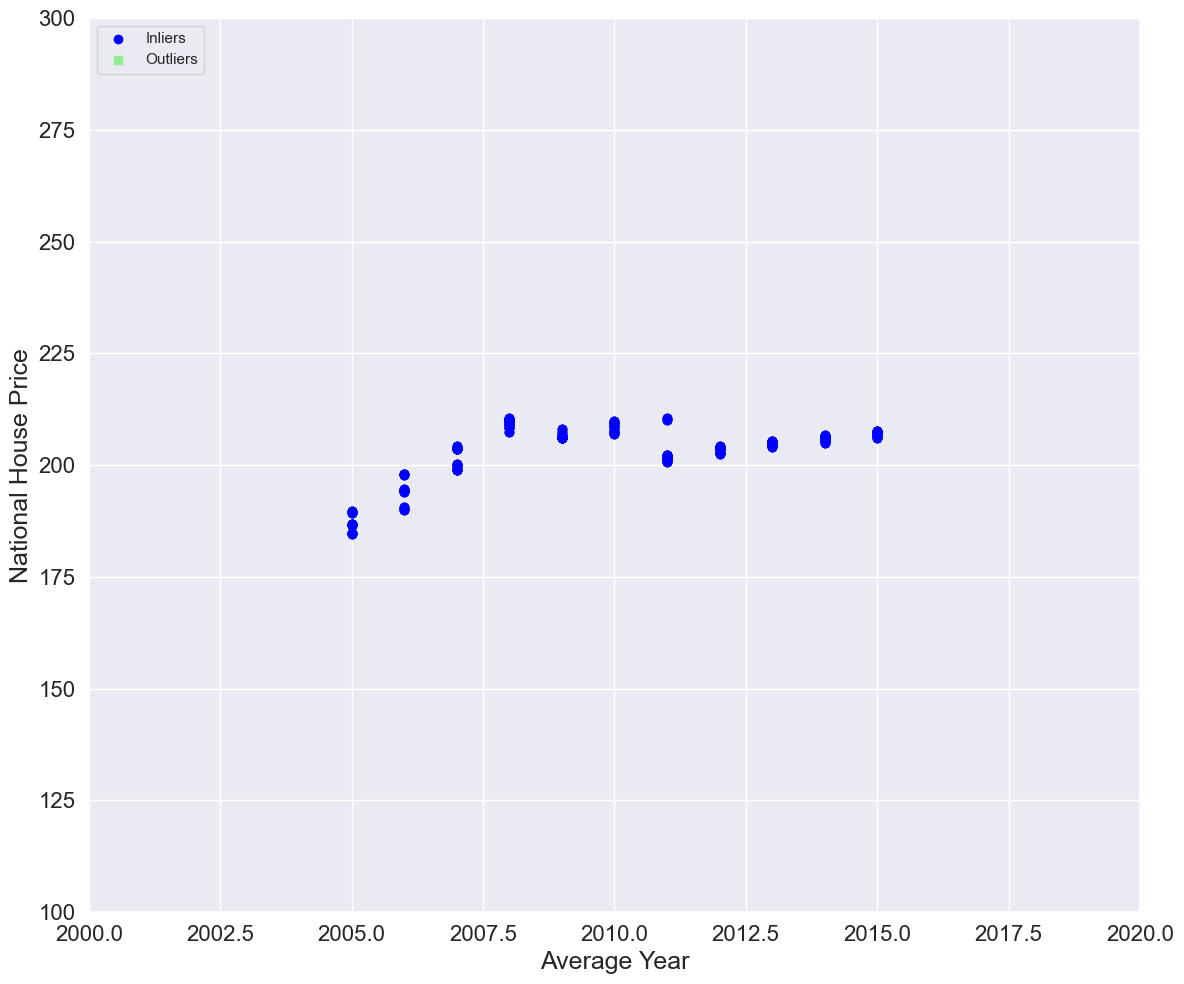

In [124]:
# import RANSACRegressor library
from sklearn.linear_model import RANSACRegressor

# Initialise an object by calling RANSACRegressor() function
ransac = RANSACRegressor(LinearRegression(), 
                         max_trials = 100, 
                         min_samples = 10,                          
                         residual_threshold = 20.0, 
                         random_state = 0)
ransac.fit(X, y)

# Store the values for inliers and outliers
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask], c = 'blue', marker = 'o', label = 'Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c = 'lightgreen', marker = 's', label = 'Outliers')
plt.plot(line_X, line_y_ransac, color = 'red')   
plt.xlabel('Average Year')
plt.ylabel('National House Price')
plt.xlim(2000,2020)
plt.ylim(100,300)
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Appears almost all values are outliers. This graph is the same as that of the data from the data set previously seen in the linear regression plot.

### Ridge Regresion 

In [125]:
# import train_test_split from the library sklearn
from sklearn.model_selection import train_test_split

# Declare variables named as 'X' and 'y'
#y = target variable.

X = merged["Year"].values.reshape(-1,1)
y = merged['Construction_Cost_Index'].values                    

# Split the data into 70% and 30% by using a parameter test_size = 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Display the shape of rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((396, 1), (396,), (277, 1), (119, 1), (277,), (119,))

In [126]:
# Initialise slr by calling a method named as 'LinearRegression()'
slr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = np.array(X_train).reshape(-1, 1)

# Trian the model
slr.fit(X_train, y_train)

# Predict the results 
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

# Display the values of y_train_pred and y_test_pred
print(y2_train_pred, '\t', y_test_pred)

[[207.78667089]
 [201.71718413]
 [198.07549207]
 [204.14497883]
 [204.14497883]
 [207.78667089]
 [209.00056825]
 [204.14497883]
 [204.14497883]
 [200.50328678]
 [209.00056825]
 [201.71718413]
 [205.35887619]
 [209.00056825]
 [205.35887619]
 [206.57277354]
 [199.28938942]
 [199.28938942]
 [207.78667089]
 [196.86159472]
 [198.07549207]
 [201.71718413]
 [196.86159472]
 [196.86159472]
 [206.57277354]
 [207.78667089]
 [207.78667089]
 [200.50328678]
 [202.93108148]
 [206.57277354]
 [209.00056825]
 [206.57277354]
 [198.07549207]
 [199.28938942]
 [205.35887619]
 [204.14497883]
 [209.00056825]
 [201.71718413]
 [200.50328678]
 [196.86159472]
 [201.71718413]
 [196.86159472]
 [200.50328678]
 [207.78667089]
 [201.71718413]
 [204.14497883]
 [202.93108148]
 [209.00056825]
 [204.14497883]
 [209.00056825]
 [204.14497883]
 [209.00056825]
 [200.50328678]
 [207.78667089]
 [206.57277354]
 [200.50328678]
 [209.00056825]
 [206.57277354]
 [198.07549207]
 [200.50328678]
 [206.57277354]
 [201.71718413]
 [202.93

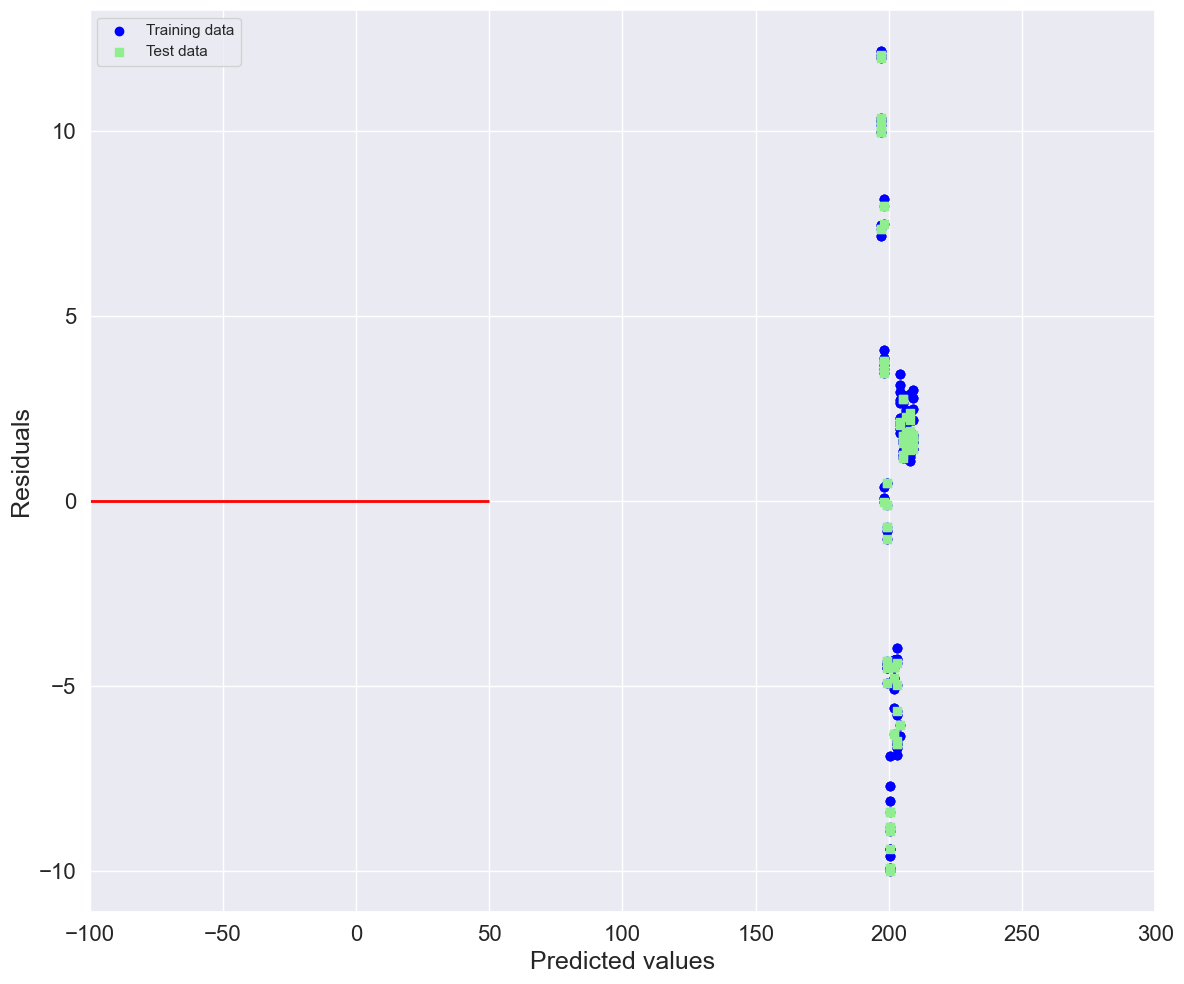

In [127]:
# Display the graph for the training and testing of the data
plt.scatter(y_train_pred,  y_train_pred - y_train, c = 'blue', marker = 'o', label = 'Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test, c = 'lightgreen', marker = 's', label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -100, xmax = 50, lw = 2, color = 'red')
plt.xlim([-100, 300])
plt.tight_layout()

plt.show()

In [128]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Using GridSearch for parameter optimization
ridgeregr = GridSearchCV(Ridge(),
                    param_grid={
                        'alpha': [0.01, 0.1, 1, 10]
                    }, verbose=1)

ridgeregr.fit(X_train, y_train)

ridge = ridgeregr.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [129]:
from sklearn.metrics import mean_squared_error

# Making predictions here
y_preds_train = ridge.predict(X_train)
y_preds_test_ridge = ridge.predict(X_test)

print("R-squared of the model in training set is: {}".format(ridge.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(mean_squared_error(y_test, y_preds_test_ridge)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test_ridge) / y_test)) * 100))

R-squared of the model in training set is: 0.36050498544963316
-----Test set statistics-----
R-squared of the model in test set is: 0.4121646170259582
Root mean squared error of the prediction is: 5.823571333464566
Mean absolute percentage error of the prediction is: 2.3601089464219855


Alpha controls regularization. High alpha values can cause overfitting on the training set. Having trialled a number of alpha values, alpha = 10 appears to give the best results for the training and test set. The training score is slightly higher than the test score. This training score indicates the models ability to fit the data it was trained on, high scores may be an indication of overfitting. 

The test score refers to the models ability to generalize new data

By using an alpha value of 10 here, it does not change the training/ test score. An extremely high value of alpha is required to see any change and even at that it reduced the score of both training and test. This wide range of alpha values is an indication there may be overfitting/underfitting within the model.

In [130]:
from sklearn.model_selection import RandomizedSearchCV

# define the parameter grid for random search
param_grid = {'alpha': [0.01, 0.1, 1, 10]}

# create a Lasso object
ridge2 = Lasso()

# create a RandomizedSearchCV object
ridgeregr2 = RandomizedSearchCV(estimator=ridge, 
                        param_distributions=param_grid,
                        n_iter=10, # number of iterations
                        cv=5, # cross-validation
                        random_state=42)

# fit the RandomizedSearchCV object on the training data
ridgeregr2.fit(X_train, y_train)

# get the best estimator from the RandomizedSearchCV object
ridge2 = ridgeregr2.best_estimator_

In [131]:
from sklearn.metrics import mean_squared_error

# Making predictions here
y_preds_train = ridge2.predict(X_train)
y_preds_test_ridge = ridge2.predict(X_test)

print("R-squared of the model in training set is: {}".format(ridge2.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge2.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(mean_squared_error(y_test, y_preds_test_ridge)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test_ridge) / y_test)) * 100))

R-squared of the model in training set is: 0.36050498544963316
-----Test set statistics-----
R-squared of the model in test set is: 0.4121646170259582
Root mean squared error of the prediction is: 5.823571333464566
Mean absolute percentage error of the prediction is: 2.3601089464219855


In [132]:
# alpha = 10 is a parameter using a fit() method
ridge10 = Ridge(alpha = 5).fit(X_train, y_train)

# Display the score values for Ridge function
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.36
Test set score: 0.41


### Lasso Regression 

In [133]:
# using GridSearch for parameter optimization
lassoregr = GridSearchCV(Lasso(),
                    param_grid={
                        'alpha': [0.01, 0.1, 1, 10]
                    }, verbose=1)

lassoregr.fit(X_train, y_train)

lasso = lassoregr.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [134]:
# We are making predictions here
y_preds_train = lasso.predict(X_train)
y_preds_test_lasso = lasso.predict(X_test)

print("R-squared of the model in training set is: {}".format(lasso.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso.score(X_test, y_test)))
print("Mean squared error of the prediction is: {}".format(mean_squared_error(y_test, y_preds_test_lasso)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test_lasso) / y_test)) * 100))

R-squared of the model in training set is: 0.36048292351757927
-----Test set statistics-----
R-squared of the model in test set is: 0.4113377834962374
Mean squared error of the prediction is: 33.96168557761273
Mean absolute percentage error of the prediction is: 2.3586493242643116


In [135]:
# define the parameter grid for random search
param_grid = {'alpha': [0.01, 0.1, 1, 10]}

# create a Lasso object
lasso2 = Lasso()

# create a RandomizedSearchCV object
lassoregr2 = RandomizedSearchCV(estimator=lasso, 
                        param_distributions=param_grid,
                        n_iter=10, # number of iterations
                        cv=5, # cross-validation
                        random_state=42)

# fit the RandomizedSearchCV object on the training data
lassoregr2.fit(X_train, y_train)

# get the best estimator from the RandomizedSearchCV object
lasso2 = lassoregr2.best_estimator_

In [136]:
# We are making predictions here
y_preds_train = lasso2.predict(X_train)
y_preds_test_lasso2 = lasso2.predict(X_test)

print("R-squared of the model in training set is: {}".format(lasso2.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso2.score(X_test, y_test)))
print("Mean squared error of the prediction is: {}".format(mean_squared_error(y_test, y_preds_test_lasso2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test_lasso2) / y_test)) * 100))

R-squared of the model in training set is: 0.36048292351757927
-----Test set statistics-----
R-squared of the model in test set is: 0.4113377834962374
Mean squared error of the prediction is: 33.96168557761273
Mean absolute percentage error of the prediction is: 2.3586493242643116


### Elastic Net Regression

In [137]:
# Load library for the ElasticNet
from sklearn.linear_model import ElasticNet

# Train the model
e_net = ElasticNet(alpha = 5)

e_net.fit(X_train, y_train)

# Calculate the prediction and mean square error
y_pred_elastic = e_net.predict(X_test)

# Calculate the mean_square_error
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)

# Display the mean square error
print("Mean Squared Error on test set", mean_squared_error)

Mean Squared Error on test set 39.51687234377015


In [138]:
print(e_net.coef_, e_net.intercept_)

[0.76127196] -1327.1453390857691


In [139]:
e_net.predict(X_train)[:10]

array([206.0563814 , 202.25002162, 199.96620575, 203.77256553,
       203.77256553, 206.0563814 , 206.81765336, 203.77256553,
       203.77256553, 201.48874966])

In [140]:
e_net.predict(X_test)[:10]

array([200.72747771, 204.53383749, 203.77256553, 199.96620575,
       206.81765336, 204.53383749, 199.96620575, 206.0563814 ,
       202.25002162, 201.48874966])

In [141]:
r2_score(y_test,y_pred_elastic)

0.3150490245833334

In [142]:
from sklearn.linear_model import RidgeCV, LassoCV,ElasticNetCV

#Tuning the model
e_net_cv_model = ElasticNetCV(cv = 10).fit(X_train,y_train)

e_net_cv_model.alpha_

0.023617801634353477

In [143]:
e_net_cv_model.intercept_

-2231.606909131745

In [144]:
# create the final model according to optimum alpha.

e_net_tuned = ElasticNet(alpha = e_net_cv_model.alpha_).fit(X_train,y_train)

# Let's now calculate the error for the test set using this final model.

y_pred = e_net_tuned.predict(X_test)

np.sqrt(mean_squared_error)

6.286244693278345

#### We can see the model has a large mean square error value. This shows the predicted values may differ significantly from the values found within the test set. Again this is an indication of potential overfitting.
Ref: https://medium.com/mlearning-ai/elasticnet-regression-fundamentals-and-modeling-in-python-8668f3c2e39e

### Decision Tree Regression

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [146]:
from sklearn.tree import DecisionTreeRegressor
DTregressor = DecisionTreeRegressor()
DTregressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [147]:
y_pred_DT = DTregressor.predict(X_test)

In [148]:
print("R-squared of the model in training set is: {}".format(DTregressor.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(DTregressor.score(X_test, y_test)))

R-squared of the model in training set is: 0.9331780409976577
-----Test set statistics-----
R-squared of the model in test set is: 0.9526431379976659


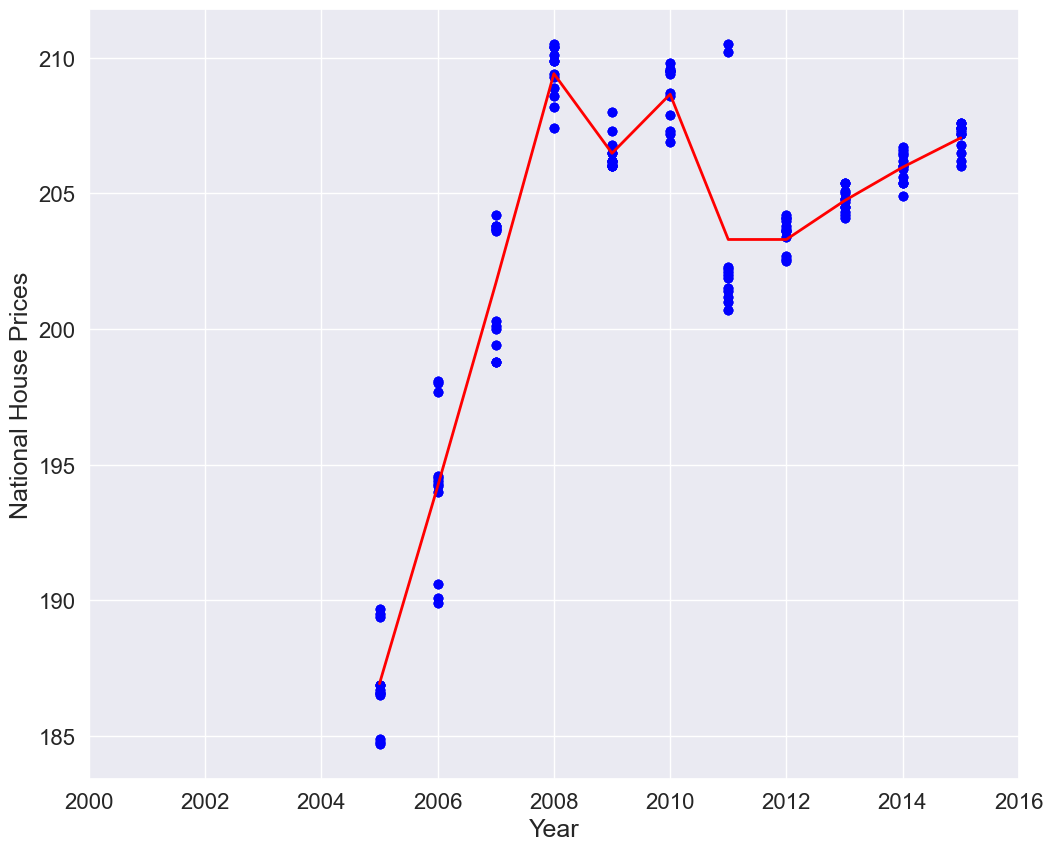

In [149]:
# Store the feature or attribute values in X and y
X = merged[['Year']].values
y = merged['Construction_Cost_Index'].values

# Initialise an object by calling a method DecisionTreeRegressor()
tree = DecisionTreeRegressor(max_depth = 5)
tree.fit(X, y)

#Colapse into one dimension
sort_idx=X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('Year')
plt.ylabel('National House Prices')
plt.xlim([2000, 2016])
plt.show()

In [150]:
r2_score

<function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', force_finite=True)>

In [151]:
tree = DecisionTreeRegressor(max_depth = 3)
tree.fit(X, y)

# Create a GridSearchCV object
grid_tree = GridSearchCV(estimator=tree, param_grid={'max_depth':[2,3,4,5,6,7,8]}, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search object on the training data
grid_tree.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_tree.best_params_
print("Best hyperparameters:", best_params)

# Get the best score
best_score = grid_tree.best_score_
print("Best score:", -best_score)

Best hyperparameters: {'max_depth': 6}
Best score: 3.060420040015389


## PCA & Clustering 

In [152]:
# Install library
!pip install PCA

In [153]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#suppress the warnings
import warnings
warnings.filterwarnings('ignore') 

In [154]:
X = merged[['Construction_Cost_Index','Property_Price_Index']]
y = merged['Year']

In [155]:
# Splitting the X and Y into the Training set and Testing set
from sklearn.model_selection import train_test_split

# Split into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [156]:
# preprocessing
from sklearn.preprocessing import StandardScaler

# Create and initialise an object (sc) by calling StandardScaler()
sc = StandardScaler()

# Train the model by calling a method fit_transform()
X_train = sc.fit_transform(X_train)

# Transform the data into standised form
X_test = sc.transform(X_test)

In [157]:
# Applying PCA to training and testing set of X 
from sklearn.decomposition import PCA

# Create and initialise an object (pca) by calling a method PCA
pca = PCA(n_components = 2)

# Transform the data 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
# Store 'explained variance'
explained_variance = pca.explained_variance_ratio_

print(explained_variance)

[0.65677535 0.34322465]


Ref - https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

### Displaying PCA Components

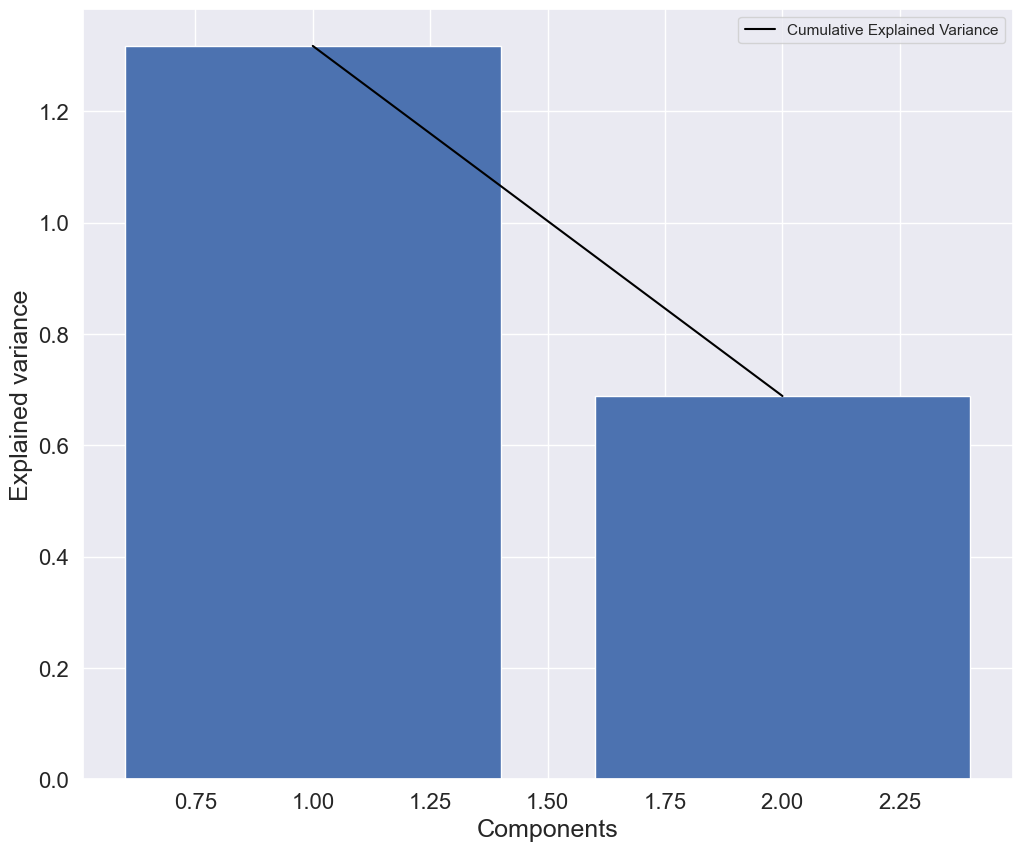

In [158]:
plt.bar(range(1,len(pca.explained_variance_ ) + 1), pca.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1, len(pca.explained_variance_ ) + 1), pca.explained_variance_,
         c = 'black',
         label = "Cumulative Explained Variance")
plt.legend(loc = 'best')

Cumalitive variance is 

## PCA 

In [159]:
# import the libraries for the cancer datasert
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [160]:
# Importing standardscalar module 
from sklearn.preprocessing import StandardScaler
  
# Preprocess the Month column as it is a string
merged['Month'] = pd.Categorical(merged['Month'])
merged['Month'] = merged['Month'].cat.codes

# Standardizing numerical columns
# Remove the string column
numeric_columns = merged.drop('Month', axis=1)  
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_columns)

# Perform PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(scaled_data)
    
x_pca.shape

(396, 2)

Text(0, 0.5, 'Second Principal Component')

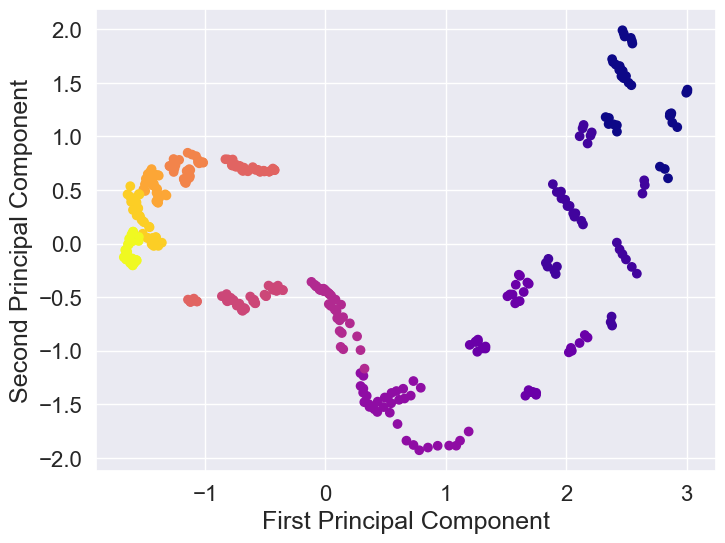

In [161]:
# giving a larger plot
plt.figure(figsize =(8, 6))
  
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = numeric_columns["Year"], cmap ="plasma")
  
# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [162]:
# Display components
pca.components_, pca.explained_variance_ratio_

(array([[-0.6510423 , -0.49657554,  0.57407025],
        [ 0.09298828, -0.80279118, -0.58896477]]),
 array([0.72291549, 0.23319922]))

## k-means Clustering

In [163]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate synthetic two-dimensional data
X, y = make_blobs(random_state = 1)

# build the clustering model
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [164]:
!pip install plotly

In [165]:
import time # for adding time delays

import matplotlib.pyplot as plt # for data visualization
import plotly.graph_objects as go # for data visualization

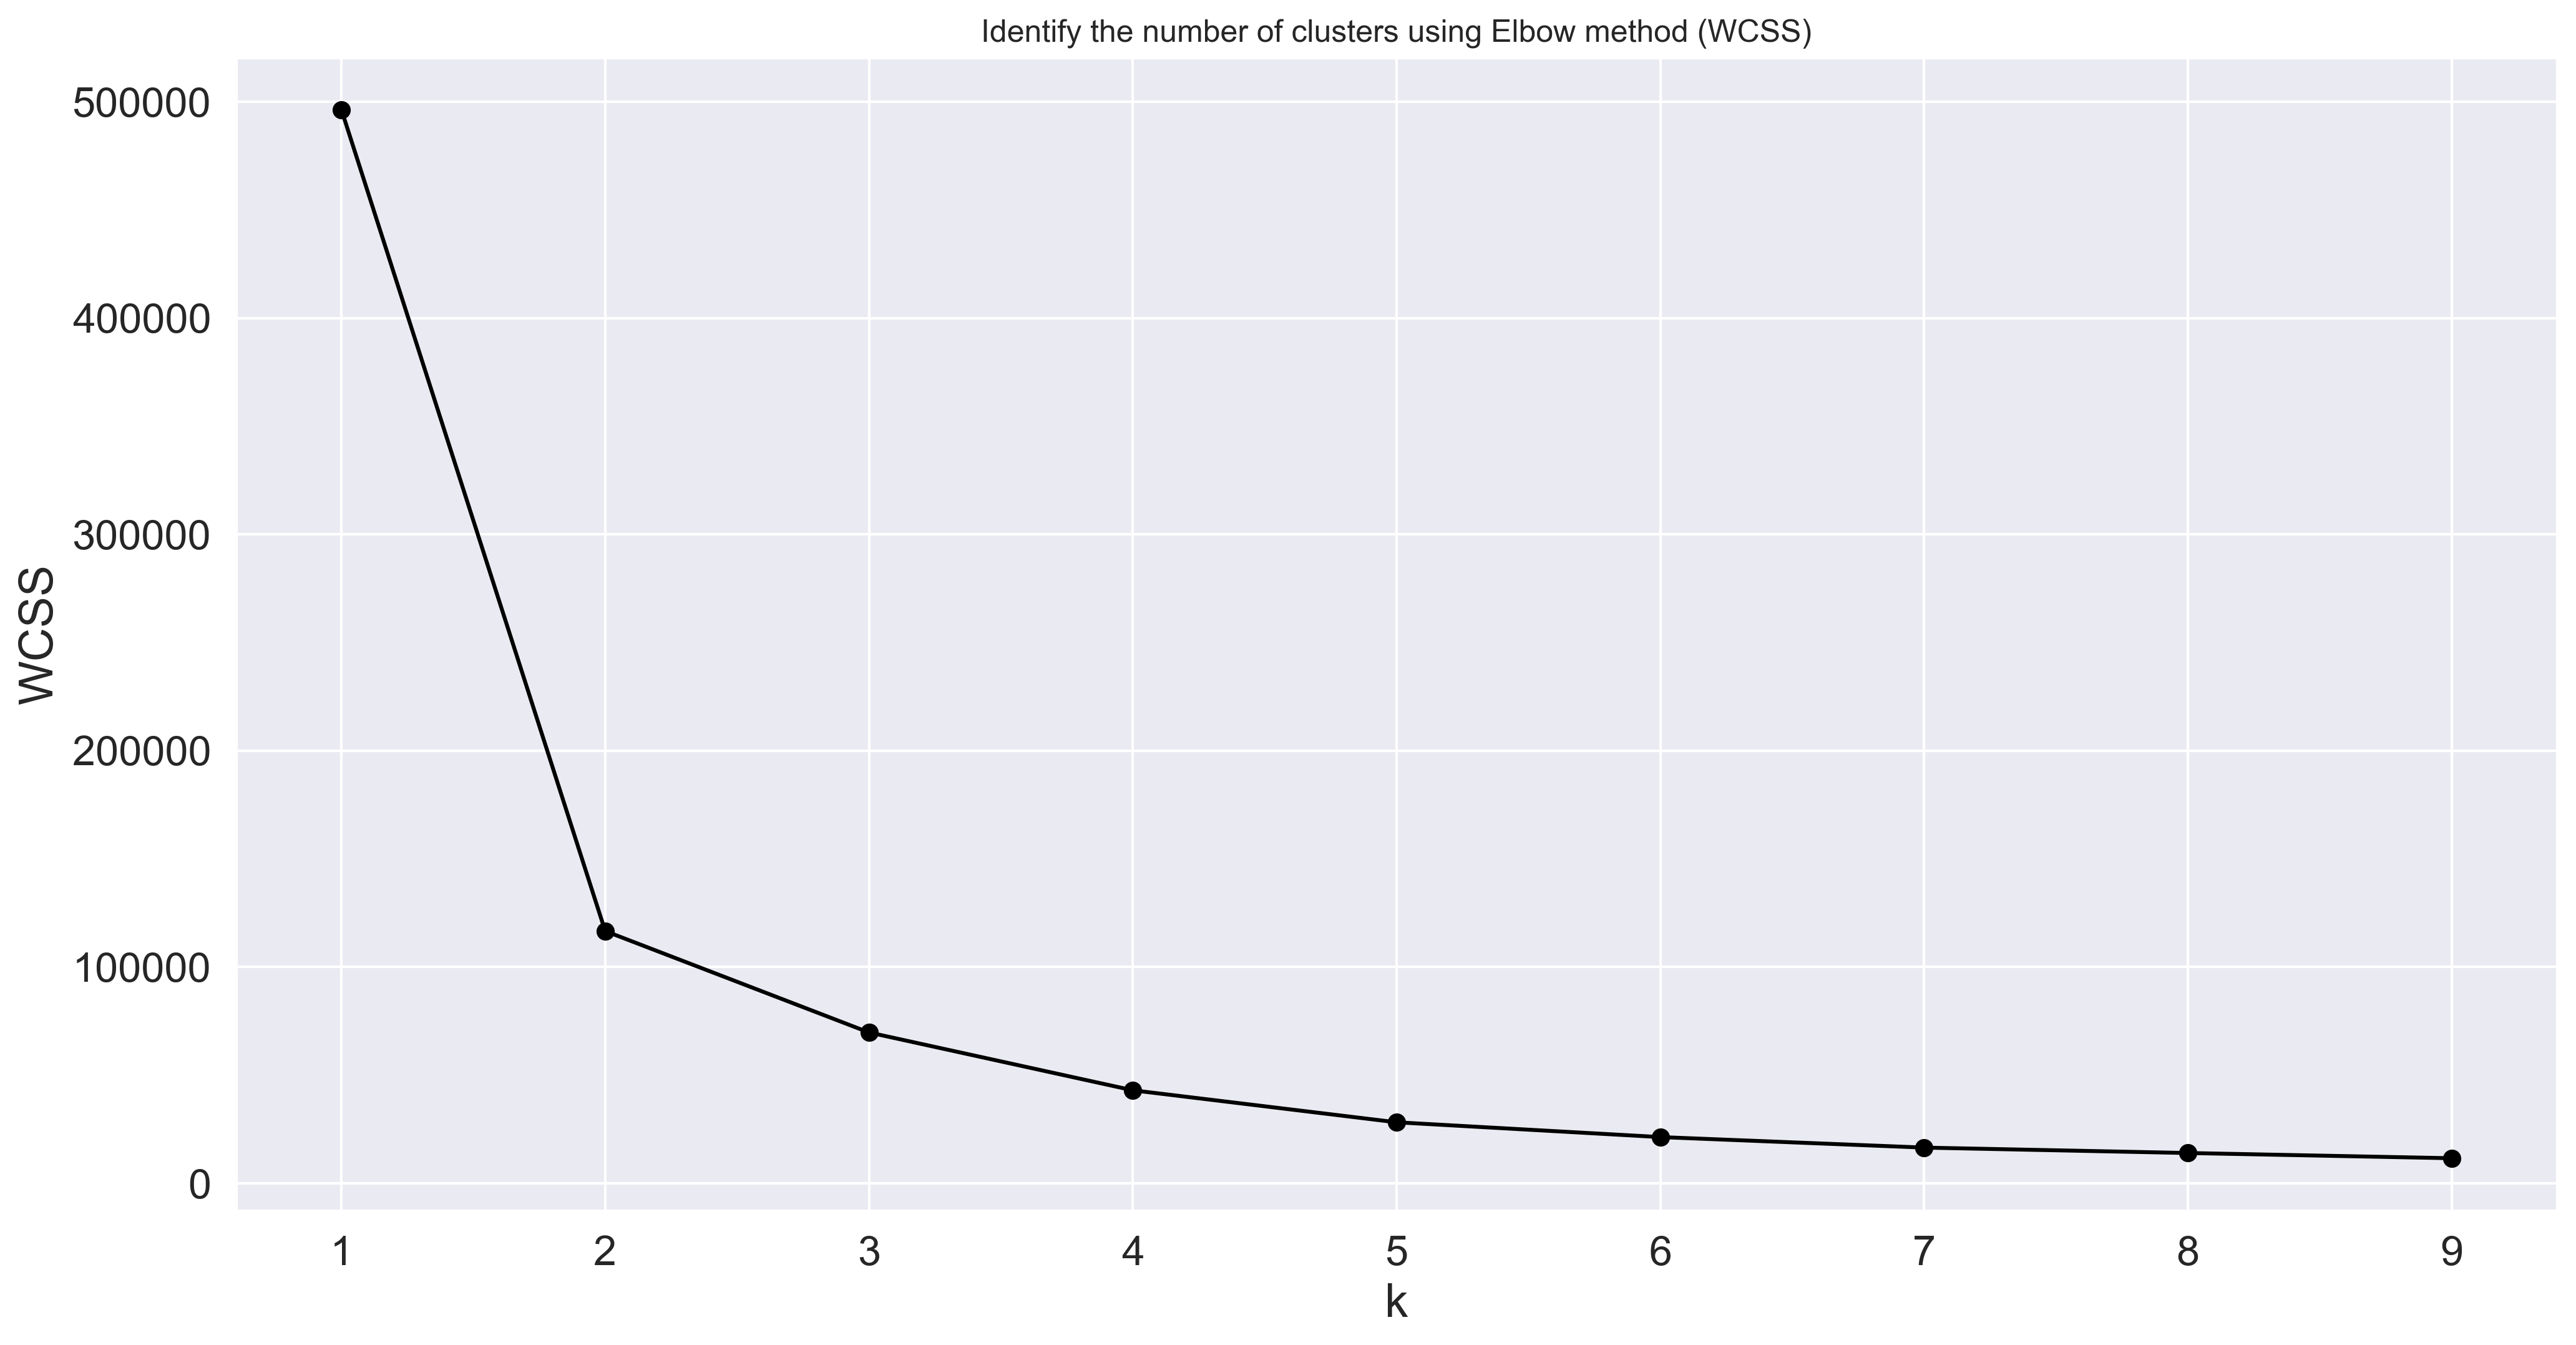

In [166]:
# Identify the number of clusters using Elbow method (WCSS)
WCSS = []
K=range(1,10)
for k in K:
    kmod = KMeans(n_clusters=k)
    kmod.fit(merged[['Construction_Cost_Index','Property_Price_Index']])
    WCSS.append(kmod.inertia_)
    
# Plot elbow graph
plt.figure(figsize=(16,8), dpi=300)
plt.plot(K, WCSS, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Identify the number of clusters using Elbow method (WCSS)')
plt.show()

In [167]:
# import KMeans library for clustering
from sklearn.cluster import KMeans

# Applying KMeans to the dataset/ Creating the kmeans classifier
kmeans = KMeans(n_clusters = 2, max_iter = 300, n_init = 10, random_state = 42)

# n_initint, default = 10, Number of time the k-means algorithm will be run with different centroid seeds. 
# The final results will be the best output of n_init consecutive runs in terms of inertia.
y_kmeans = kmeans.fit_predict(merged)

print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [168]:
 # lowest SSE value
kmeans.inertia_

122444.57611016951

In [169]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[2012.20338983,    5.58050847,  205.5559322 ,   91.05338983],
       [2006.75      ,    5.38125   ,  198.945     ,  153.81125   ]])

In [170]:
# number of iterations required to converge
kmeans.n_iter_

4

In [171]:
# Select data for clustering model
X = merged[['Construction_Cost_Index','Property_Price_Index']]

# Set the model and its parameters - 2 clusters
model2 = KMeans(n_clusters=2,
                init='k-means++', # Smart initialization of centroids, alternative option 'random'
                n_init=10, # Number of time the k-means algorithm will be run with different centroid seeds, default=10
                max_iter=100, # maximum number of iterations to run default=300
               )

# Set the model and its parameters - 3 clusters
model3 = KMeans(n_clusters=3,
                init='k-means++', # Smart initialization of centroids, alternative option 'random'
                n_init=10, # Number of time the k-means algorithm will be run with different centroid seeds, default=10
                max_iter=100, # maximum number of iterations to run default=300
               )

# Fit the model (2 and 3 clusters)
clust2 = model2.fit(X)
clust3 = model3.fit(X)

# Print model summary
print('*************** 2 Cluster Model ***************')
print('Cluster centers: ', clust2.cluster_centers_)
print('Inertia (WCSS): ', clust2.inertia_)
print('No. of iterations: ', clust2.n_iter_)
print()

print('*************** 3 Cluster Model ***************')
print('Cluster centers: ', clust3.cluster_centers_)
print('Inertia (WCSS): ', clust3.inertia_)
print('No. of iterations: ', clust3.n_iter_)

*************** 2 Cluster Model ***************
Cluster centers:  [[198.94267516 154.41273885]
 [205.47447699  91.4460251 ]]
Inertia (WCSS):  116598.9066321989
No. of iterations:  3

*************** 3 Cluster Model ***************
Cluster centers:  [[205.36287129  87.16287129]
 [200.65514019 164.15514019]
 [199.87356322 125.59655172]]
Inertia (WCSS):  69716.91057602086
No. of iterations:  8


In [172]:
merged.head()

Year  Month  Construction_Cost_Index  Property_Price_Index
132  2005      0                    186.5                 127.5
133  2005      0                    186.5                 123.7
134  2005      0                    186.5                 153.5
135  2005      1                    186.9                 133.8
136  2005      1                    186.9                 130.2

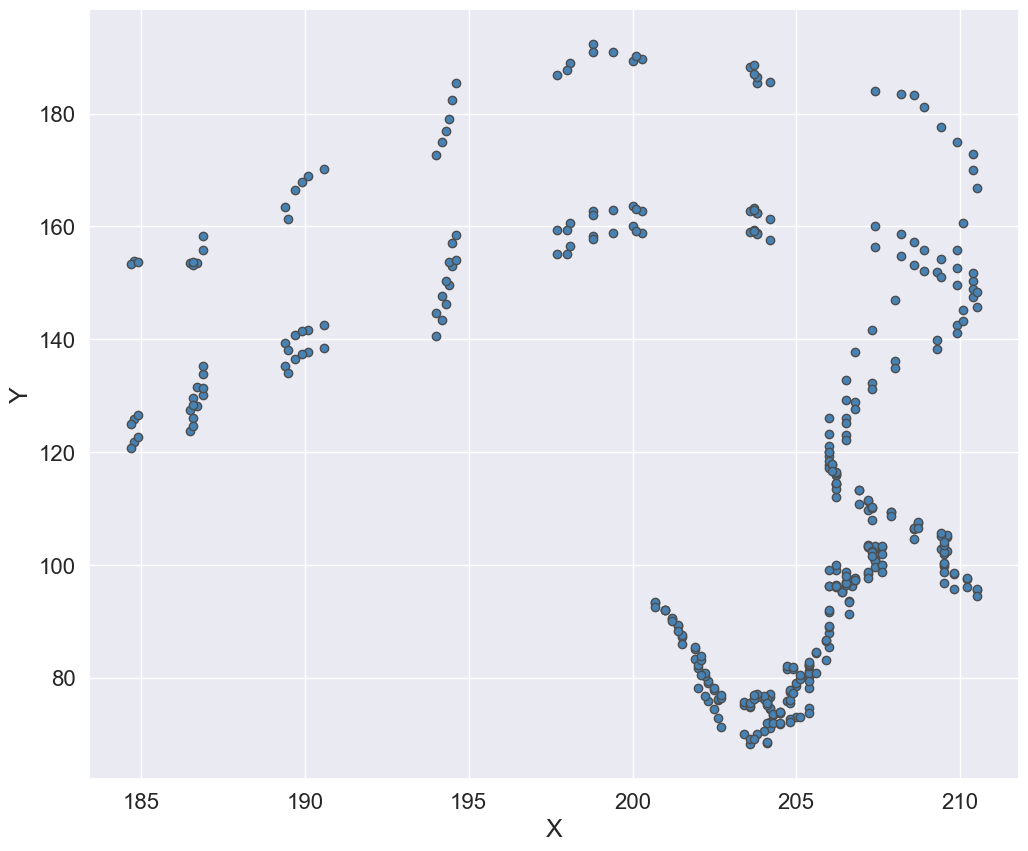

In [173]:
plt.scatter(merged['Construction_Cost_Index'], merged['Property_Price_Index'],
           color='SteelBlue', edgecolors='0.3');
plt.xlabel('X')
plt.ylabel('Y')
plt.subplots_adjust(wspace=0.25);

Text(0, 0.5, 'Counts')

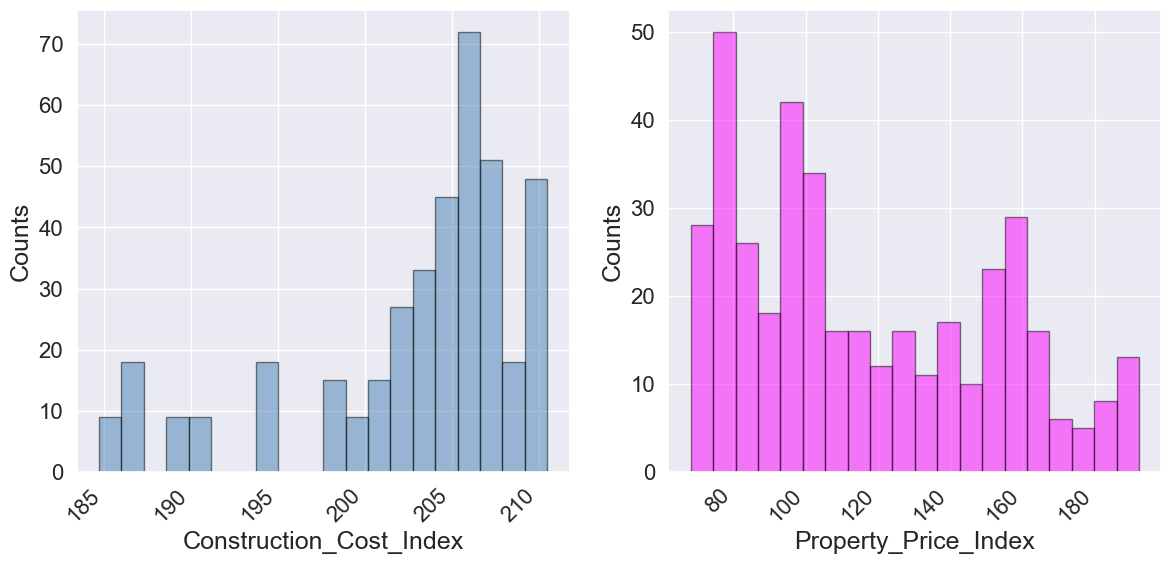

In [174]:
plt.subplots(12, figsize=(14, 6))
plt.subplot(121)
plt.hist(merged['Construction_Cost_Index'], bins=20, color='SteelBlue', alpha=0.5, histtype='bar', ec='black')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Construction_Cost_Index')
plt.ylabel('Counts')

plt.subplot(122)
plt.hist(merged['Property_Price_Index'], bins=20, color='magenta', alpha=0.5, histtype='bar', ec='black')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Property_Price_Index')
plt.ylabel('Counts')

#plt.subplot(123)
#circle_sizes = 200 * merged["Year"]
#plt.scatter(merged['Construction_Cost_Index'], merged['Property_Price_Index'],s=100 * merged['Year'] / merged['Year'].max(),
            #color='SteelBlue', edgecolors='0.3')
#plt.xlabel('Absolute Latitude (Degrees, \'DFE\')')
#plt.ylabel('Suicide Rate (per 100\')')
#plt.subplots_adjust(wspace=0.25)

In [175]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette scores
silhouette_avg2 = silhouette_score(X, clust2.labels_)
silhouette_avg3 = silhouette_score(X, clust3.labels_)

print('*************** Silhouette Scores ***************')
print('2 Cluster Model: ', silhouette_avg2)
print('3 Cluster Model: ', silhouette_avg3)

*************** Silhouette Scores ***************
2 Cluster Model:  0.6578369006957572
3 Cluster Model:  0.5462079132740102


## Gaussian Mixture Model

This clustering model uses a multivariate probability distribution along with a Gaussian probability distribution.

In [176]:
merged

Year  Month  Construction_Cost_Index  Property_Price_Index
132  2005      0                    186.5                 127.5
133  2005      0                    186.5                 123.7
134  2005      0                    186.5                 153.5
135  2005      1                    186.9                 133.8
136  2005      1                    186.9                 130.2
..    ...    ...                      ...                   ...
523  2015     10                    207.2                 103.2
524  2015     10                    207.2                 103.3
525  2015     11                    207.3                 102.4
526  2015     11                    207.3                 102.2
527  2015     11                    207.3                 101.6

[396 rows x 4 columns]

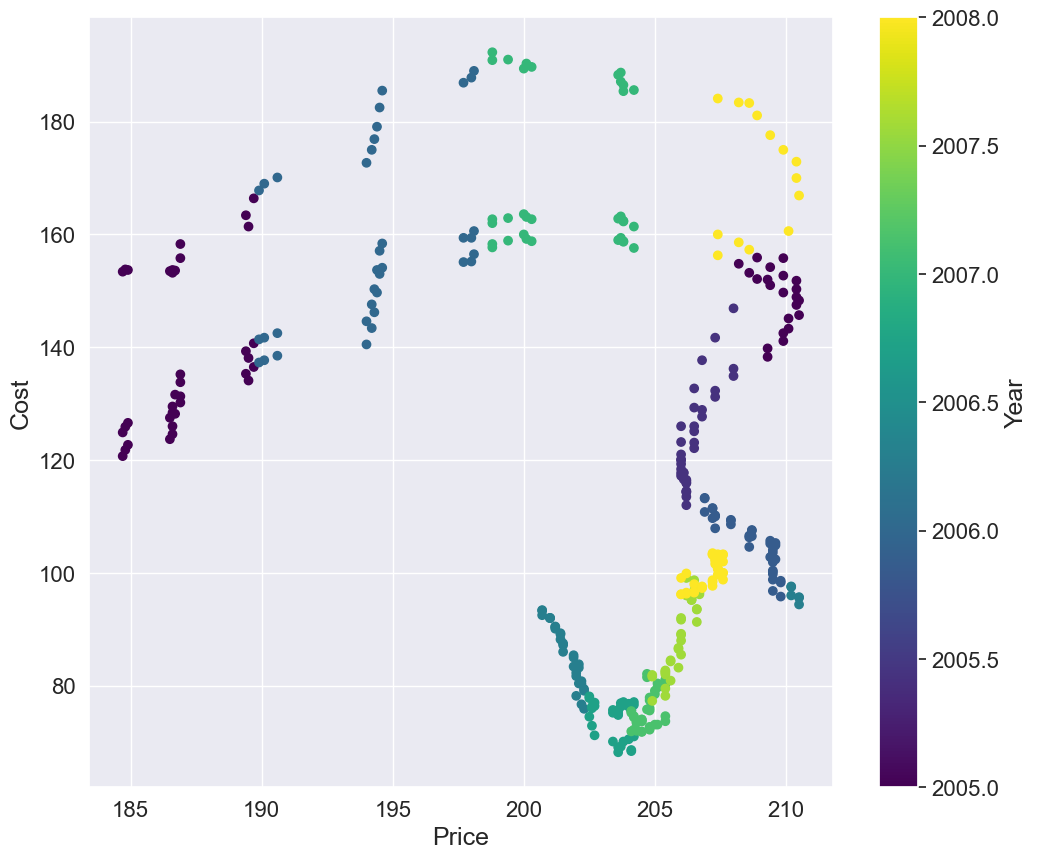

In [177]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot

# define the model
model = GaussianMixture(n_components=2)

# fit the model
model.fit(merged[["Construction_Cost_Index","Property_Price_Index"]].values)

# assign a cluster to each example
yhat = model.predict(merged[["Construction_Cost_Index","Property_Price_Index"]].values)

# retrieve unique clusters
clusters = unique(yhat)

# create scatter plot for samples from each cluster
for cluster in clusters:

# get row indexes for samples with this cluster
 row_ix = where(yhat == cluster)
    
# create scatter of these samples
 plt.scatter(merged.iloc[row_ix]['Construction_Cost_Index'], merged.iloc[row_ix]['Property_Price_Index'], c=merged.iloc[row_ix]['Year'], cmap='viridis')

# show the plot
cbar = plt.colorbar()
cbar.set_label('Year')
plt.xlabel('Price')
plt.ylabel('Cost')
plt.show()

In [178]:
import numpy as np

In [179]:
silhouette_avg = silhouette_score(merged[["Construction_Cost_Index", "Property_Price_Index"]].values, yhat)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5468321683979126


Ref - https://machinelearningmastery.com/clustering-algorithms-with-python/

## DBSCAN Clustering

DBASCAN stands for density based spatial clustering of applications with noise. Works by computing nearest neighbour graphs to find clusters and outliers. The main different between this and knn is the shape of the clusters. DBSCAN uses arbitrary shaped clusters and knn uses spherical shaped clusters.

In [180]:
from sklearn.cluster import DBSCAN

In [181]:
X_train = merged[["Construction_Cost_Index","Property_Price_Index","Year"]]

In [182]:
clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_train)
DBSCAN_dataset = X_train.copy()
DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_ 

In [183]:
DBSCAN_dataset.Cluster.value_counts().to_frame()

Cluster
0      396

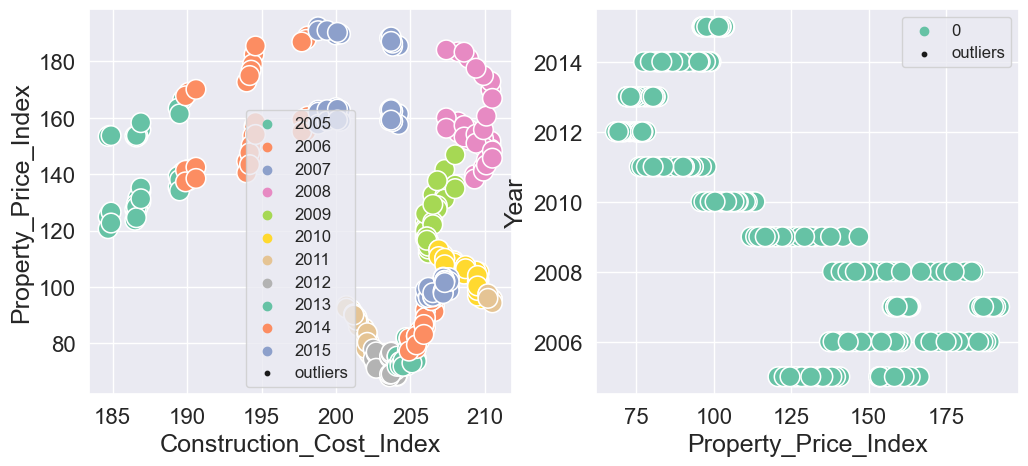

In [184]:
outliers = DBSCAN_dataset[DBSCAN_dataset['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot("Construction_Cost_Index","Property_Price_Index","Year",

                data=DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1],

                hue='Cluster', ax=axes[0], palette='Set2', legend='full', s=200)

sns.scatterplot("Property_Price_Index","Year",

                data=DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1],

                hue='Cluster', palette='Set2', ax=axes[1], legend='full', s=200)

axes[0].scatter(outliers['Construction_Cost_Index'], outliers['Year'], s=10, label='outliers', c="k")

axes[1].scatter(outliers['Property_Price_Index'], outliers['Year'], s=10, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='12')
plt.setp(axes[1].get_legend().get_texts(), fontsize='12')

plt.show()

In [185]:
from sklearn.neighbors import NearestNeighbors
# n_neighbors = 10 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
nbrs = NearestNeighbors(n_neighbors = 10).fit(merged)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(merged)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

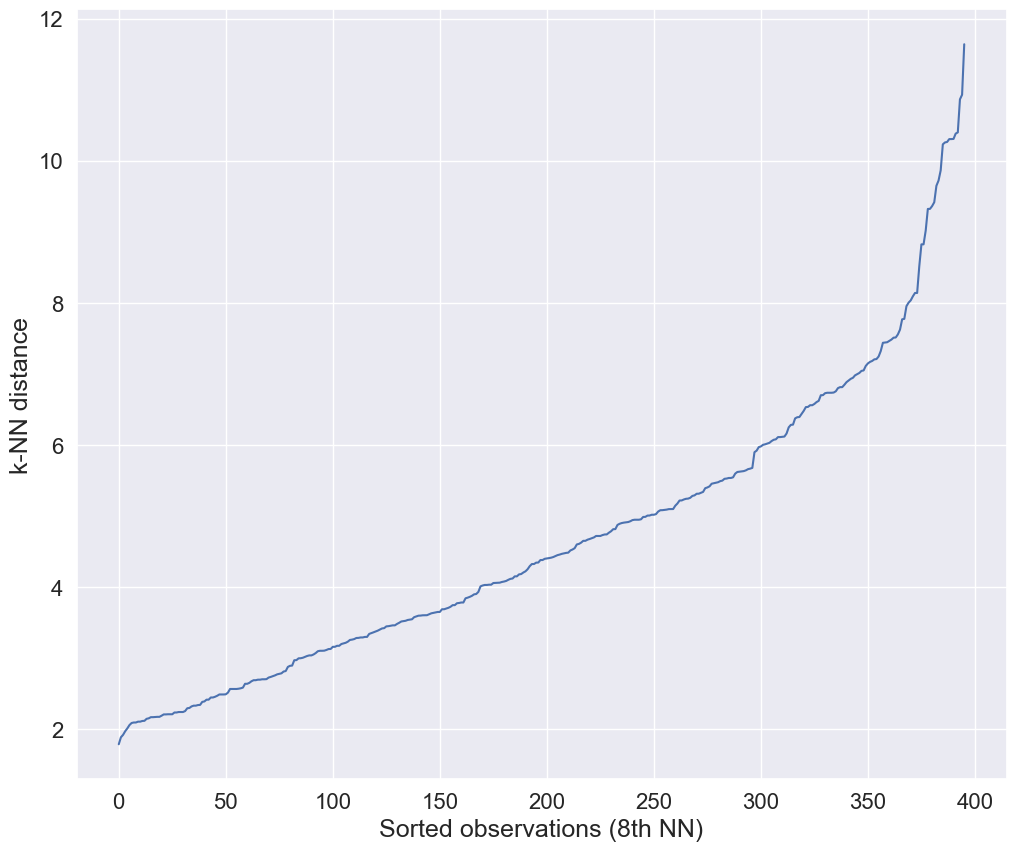

In [186]:
k_dist = sort_neigh_dist[:, 8]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (8th NN)")
plt.show()

In [187]:
from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, 
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)

10.38075141788878


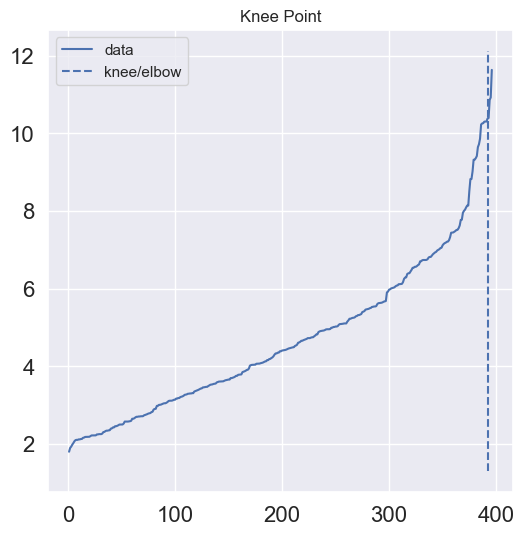

In [188]:
kneedle.plot_knee()
plt.show()

We take 10.38 as the optimum value of e.

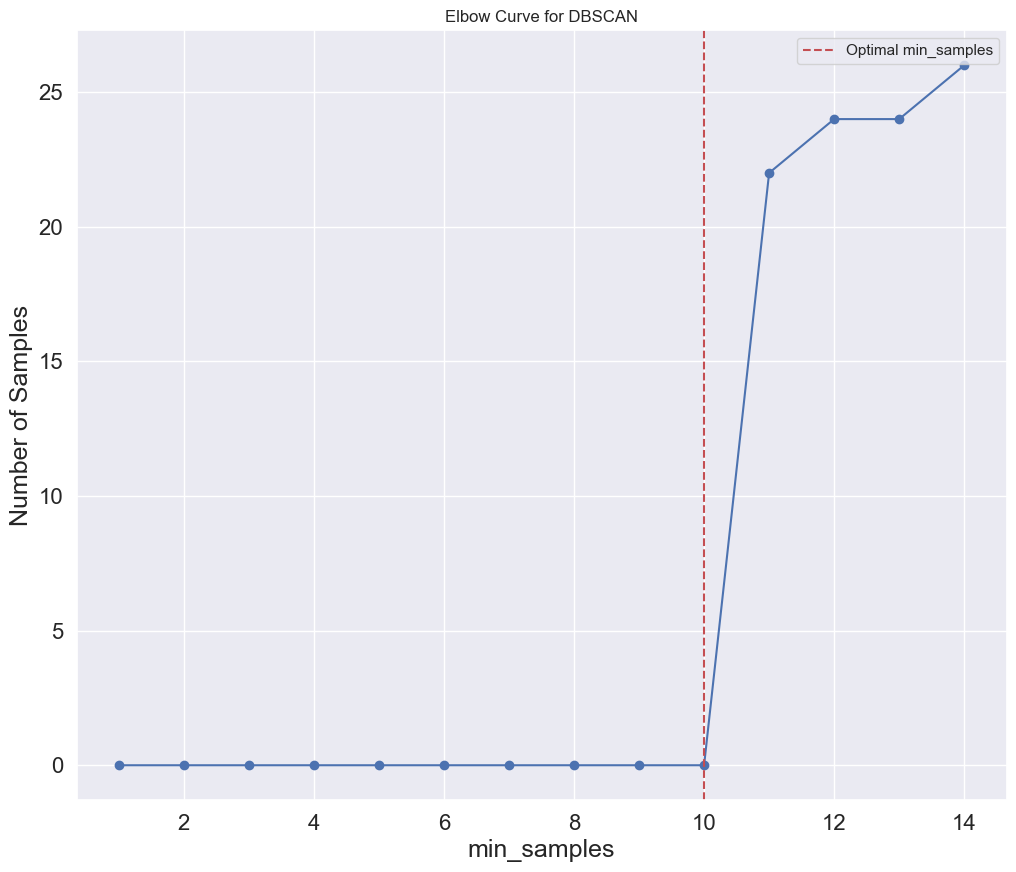

Optimal min_samples value: 10


In [189]:
min_samples_range = range(1, 15)  # Range of min_samples values to test
eps = 10.38

num_samples = []
for min_samples in min_samples_range:
    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(X_train)
    unique_labels, counts = np.unique(clustering.labels_, return_counts=True)
    num_samples.append(len(X_train) - counts[0])  # Subtracting noise samples

# Calculating the second derivative of the number of samples
second_derivatives = np.gradient(np.gradient(num_samples))

# Finding the index of the elbow point
elbow_index = np.argmax(second_derivatives)

# Extracting the optimal min_samples value
optimal_min_samples = min_samples_range[elbow_index]

# Plotting the elbow curve
plt.plot(min_samples_range, num_samples, marker='o')
plt.xlabel('min_samples')
plt.ylabel('Number of Samples')
plt.title('Elbow Curve for DBSCAN')
plt.axvline(x=optimal_min_samples, color='r', linestyle='--', label='Optimal min_samples')
plt.legend()
plt.show()

print("Optimal min_samples value:", optimal_min_samples)

In [190]:
from sklearn.metrics import silhouette_samples

min_samples=[1,2,3,4,5,6,7,8,9,10]
for i in min_samples:
    print("min_samples value is "+str(i))
    db=DBSCAN(eps = 10.38, min_samples =i).fit(merged)
    core_samples_mask=np.zeros_like(db.labels_,dtype=bool)
    core_samples_mask[db.core_sample_indices_]=True
    labels= db.labels_
    unique_labels = set(labels[labels != -1])
    num_clusters = len(unique_labels)
    print(set(labels))
    print("For min_samples value =",i, "Total no. of clusters are",num_clusters)

min_samples value is 1
{0}
For min_samples value = 1 Total no. of clusters are 1
min_samples value is 2
{0}
For min_samples value = 2 Total no. of clusters are 1
min_samples value is 3
{0}
For min_samples value = 3 Total no. of clusters are 1
min_samples value is 4
{0}
For min_samples value = 4 Total no. of clusters are 1
min_samples value is 5
{0}
For min_samples value = 5 Total no. of clusters are 1
min_samples value is 6
{0}
For min_samples value = 6 Total no. of clusters are 1
min_samples value is 7
{0}
For min_samples value = 7 Total no. of clusters are 1
min_samples value is 8
{0}
For min_samples value = 8 Total no. of clusters are 1
min_samples value is 9
{0}
For min_samples value = 9 Total no. of clusters are 1
min_samples value is 10
{0, 1}
For min_samples value = 10 Total no. of clusters are 2


In [191]:
clusters = DBSCAN(eps = 10.38, min_samples = 10).fit(merged)
# get cluster labels
clusters.labels_
# output
pd.array([0, 0, 1, ..., 1, 1, 1])

# check unique clusters
set(clusters.labels_)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1}
# -1 value represents noisy points could not assigned to any cluster

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [192]:
from collections import Counter
Counter(clusters.labels_)

Counter({0: 374, 1: 22})

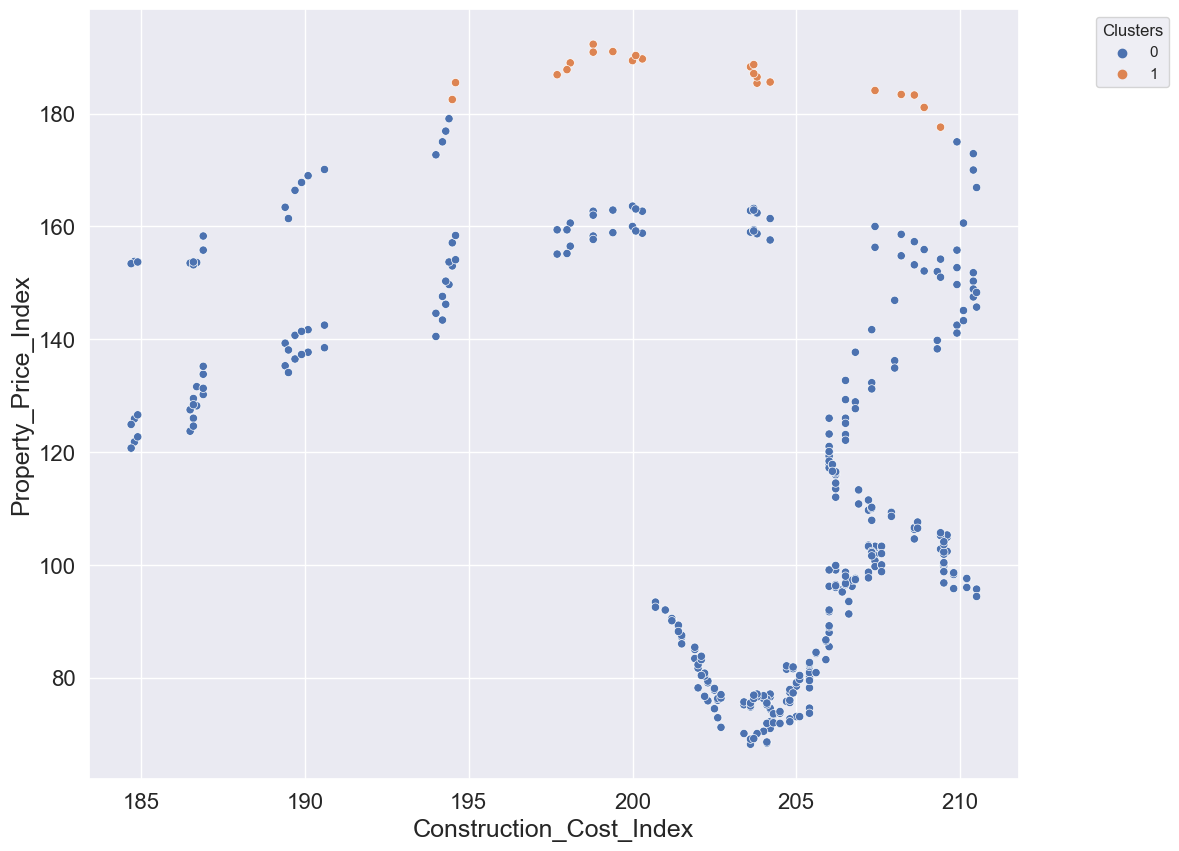

In [193]:
p = sns.scatterplot(data = merged, x = "Construction_Cost_Index", y = "Property_Price_Index", hue = clusters.labels_, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()

In [194]:
from sklearn.metrics import silhouette_score
DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_
cluster_labels = DBSCAN_dataset['Cluster']

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_train, clusters.labels_)

print("DBSCAN Silhouette Score:", silhouette_avg)

DBSCAN Silhouette Score: 0.40060058978781615


Ref - https://www.reneshbedre.com/blog/dbscan-python.html
Ref - https://www.kdnuggets.com/2022/08/implementing-dbscan-python.html#

### Time Series Analysis - Construction Indices data set 

In [195]:
df5_pivot.head()

Construction indices   DateCode  All work  New Housing  Other new work  \
0                    2010-11-01     101.7        102.3           101.3   
1                    2010-12-01     101.4        102.0           101.3   
2                    2011-01-01     103.1        102.2           103.5   
3                    2011-02-01     104.4        103.1           105.0   
4                    2011-03-01     105.6        103.7           106.5   

Construction indices  Repairs and maintenance  
0                                       102.5  
1                                       102.2  
2                                       102.6  
3                                       103.7  
4                                       104.4

In [196]:
import plotly.express as px
fig = px.line(df5_pivot, x="DateCode", y=["All work", "New Housing","Other new work", "Repairs and maintenance"], template = 'plotly_dark')
fig.show()

In [197]:
# extract month and year from dates
df5_pivot['Month'] = [i.month for i in df5_pivot['DateCode']]
df5_pivot['Year'] = [i.year for i in df5_pivot['DateCode']]

In [198]:
# create a sequence of numbers
df5_pivot['Series'] = np.arange(1,len(df5_pivot)+1)

# drop unnecessary columns and re-arrange
df5_pivot.drop(['DateCode'], axis=1, inplace=True)
df5_pivot = df5_pivot[['Year', 'Month', 'New Housing','All work','Other new work','Repairs and maintenance']] 

# check the head of the dataset
df5_pivot.head()

Construction indices  Year  Month  New Housing  All work  Other new work  \
0                     2010     11        102.3     101.7           101.3   
1                     2010     12        102.0     101.4           101.3   
2                     2011      1        102.2     103.1           103.5   
3                     2011      2        103.1     104.4           105.0   
4                     2011      3        103.7     105.6           106.5   

Construction indices  Repairs and maintenance  
0                                       102.5  
1                                       102.2  
2                                       102.6  
3                                       103.7  
4                                       104.4

In [199]:
y = df5_pivot['Year']
X = df5_pivot.drop(['Year'],axis=1)

In [200]:
#create the regression model object and fit the data into it
reg_obj = linear_model.LinearRegression()

reg_obj.fit(X,y)

LinearRegression()

In [201]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [202]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(83, 5)
(21, 5)
(83,)
(21,)


In [203]:
lrm = LinearRegression()
lrm.fit(X_train, Y_train) #fit an OLS model

LinearRegression()

In [204]:
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)  #making predictions

In [205]:
print("R-squared of the model in training set is: {}".format(lrm.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test) / Y_test)) * 100))

R-squared of the model in training set is: 0.9800691994001669
-----Test set statistics-----
R-squared of the model in test set is: 0.9782128630690607
Root mean squared error of the prediction is: 0.4060915501582391
Mean absolute percentage error of the prediction is: 0.015605601871751935


Considered using pycaret to pass the training/test data and cross-validation strategy using the 'fold_stratgey'. This would have allowed a comparison of a number of models, looking at MAE, MSE and r2 values. Pycaret is a library which allows automated machine learning workflows. Upon attempting to run the cell 'pip install pycaret', it was discovered that an error appeared and it was not possible to install.

In [206]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

In [207]:
model = HWES(train, seasonal_periods=12, trend='add', seasonal='mul')
fitted = model.fit()

NameError: name 'train' is not defined

## time series using df6 Index of Employment in construction (1975 - 2008)

In [ ]:
df6.head()

In [ ]:
fig = px.line(df6, x="Year", y="VALUE", template = 'plotly_dark')
fig.show()

In [ ]:
# Split the dataset into features (X) and target variable (y)
X = df5_pivot[['New Housing']]
y = df5_pivot['Year']

# Split the dataset into training and testing. Taking 20% test size, 80% training size. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Transform using standard scaler.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Verify the sizes of the resulting splits
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")
#https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn

In [ ]:
df5_pivot.loc[df5_pivot.Year==2010, 'Repairs and maintenance']

In [ ]:
import matplotlib.colors as mcolors

# Prep Colors
np.random.seed(100)
start_year = 1975
end_year = 2008
years = list(range(start_year, end_year + 10))
mycolors = np.random.choice(list(mcolors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:
        df_year = df5_pivot.loc[df5_pivot.Year == y, :]
        if not df_year.empty:
            plt.plot(df_year['Repairs and maintenance'], df_year['New Housing'], color=mycolors[i], label=str(y))
            plt.text(df_year.shape[0] - 0.9, df_year['New Housing'].values[-1], str(y), fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(0, 250), ylim=(100, 250), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df5_pivot['New Housing'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df5_pivot['New Housing'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

Ref - https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python

In [ ]:
df5_pivot

In [ ]:
df5_pivot.dtypes

In [ ]:
df5_pivot['Date'] = df5_pivot['Year'] + pd.to_timedelta(df5_pivot['Month'] - 1, unit='M')

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

df5_pivot['Date'] = pd.to_datetime(df5_pivot[['Year', 'Month']].assign(day=1))
df5_pivot = df5_pivot.set_index('Date')

# Perform seasonal decomposition using the 'Year' column
decomposition = sm.tsa.seasonal_decompose(df5_pivot['Year'], model='additive')

fig = decomposition.plot()
plt.show()

In [ ]:
import itertools
import statsmodels.api as sm

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

In [1]:
!pip install praw
!pip install wordcloud
!pip install python-dotenv
import pandas as pd
import numpy as np

# misc
import datetime as dt
from pprint import pprint
from itertools import chain

# reddit crawler
import praw

# sentiment analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize, RegexpTokenizer # tokenize words
from nltk.corpus import stopwords

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 8) # default plot size
import seaborn as sns
sns.set(style='whitegrid', palette='Dark2')
from wordcloud import WordCloud

In [2]:
# Models for sentiment analysis 
nltk.download('vader_lexicon') # get lexicons data
nltk.download('punkt') # for tokenizer
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/seankearney/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/seankearney/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/seankearney/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
from dotenv import load_dotenv
from os import getenv
load_dotenv()

USER_AGENT = getenv('USER_AGENT')
CLIENT_ID = getenv('CLIENT_ID')
CLIENT_SECRET = getenv('CLIENT_SECRET')

In [4]:
# Set up Reddit Client 
r = praw.Reddit(user_agent=USER_AGENT,
                client_id=CLIENT_ID,
                client_secret=CLIENT_SECRET,
                check_for_async=True)

In [5]:
subreddits = ['ireland', 'RealEstate', 'PersonalFinance', 'RealEstateInvesting']  # List of subreddits
keyword_combinations = [
    ['house', 'price'],
    ['building', 'cost'],
    ['construction', 'salary']
]  

results = []

for subreddit_name in subreddits:
    subreddit = r.subreddit(subreddit_name)
    for keywords in keyword_combinations:
        posts = subreddit.search(' '.join(keywords), time_filter='all')
        filtered_posts = [post for post in posts if all(keyword in post.title or keyword in post.selftext for keyword in keywords)]
        results.extend(filtered_posts)

print(len(results))

658


In [6]:
# Sample output
title = [result.title for result in results]
result_df = pd.DataFrame({
    "title": title,
})
result_df.head()

title
0  Third consecutive month of house price decline...
1  First-time buyers dominate market as average h...
2  Irish house prices rise 8.9% in first three mo...
3  Crazy house prices: ‘I think it’s starting to ...
4  House Prices Continue to Fall as Borrowing Cos...

In [7]:
sid = SentimentIntensityAnalyzer()

In [8]:
# run sentiment on the post title
res = [*result_df['title'].apply(sid.polarity_scores)]
pprint(res[:3])

[{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': -0.128, 'neg': 0.12, 'neu': 0.88, 'pos': 0.0},
 {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}]


In [9]:
#create a sentiment df using the sentiment result and combine it to results df (the posts)
sentiment_df = pd.DataFrame.from_records(res)
df_vardar_results = pd.concat([result_df, sentiment_df], axis=1, join='inner')
df_vardar_results.head()

title    neg    neu  pos  \
0  Third consecutive month of house price decline...  0.000  1.000  0.0   
1  First-time buyers dominate market as average h...  0.120  0.880  0.0   
2  Irish house prices rise 8.9% in first three mo...  0.000  1.000  0.0   
3  Crazy house prices: ‘I think it’s starting to ...  0.156  0.844  0.0   
4  House Prices Continue to Fall as Borrowing Cos...  0.000  1.000  0.0   

   compound  
0     0.000  
1    -0.128  
2     0.000  
3    -0.340  
4     0.000

In [10]:
#https://github.com/cjhutto/vaderSentiment#about-the-scoring
THRESHOLD = 0.05

conditions = [
    (df_vardar_results['compound'] <= -THRESHOLD),
    (df_vardar_results['compound'] > -THRESHOLD) & (df_vardar_results['compound'] < THRESHOLD),
    (df_vardar_results['compound'] >= THRESHOLD),
    ]

values = ["neg", "neu", "pos"]
df_vardar_results['label'] = np.select(conditions, values)

df_vardar_results.head()

title    neg    neu  pos  \
0  Third consecutive month of house price decline...  0.000  1.000  0.0   
1  First-time buyers dominate market as average h...  0.120  0.880  0.0   
2  Irish house prices rise 8.9% in first three mo...  0.000  1.000  0.0   
3  Crazy house prices: ‘I think it’s starting to ...  0.156  0.844  0.0   
4  House Prices Continue to Fall as Borrowing Cos...  0.000  1.000  0.0   

   compound label  
0     0.000   neu  
1    -0.128   neg  
2     0.000   neu  
3    -0.340   neg  
4     0.000   neu

In [11]:
df_vardar_results.label.value_counts()

neu    373
pos    169
neg    116
Name: label, dtype: int64

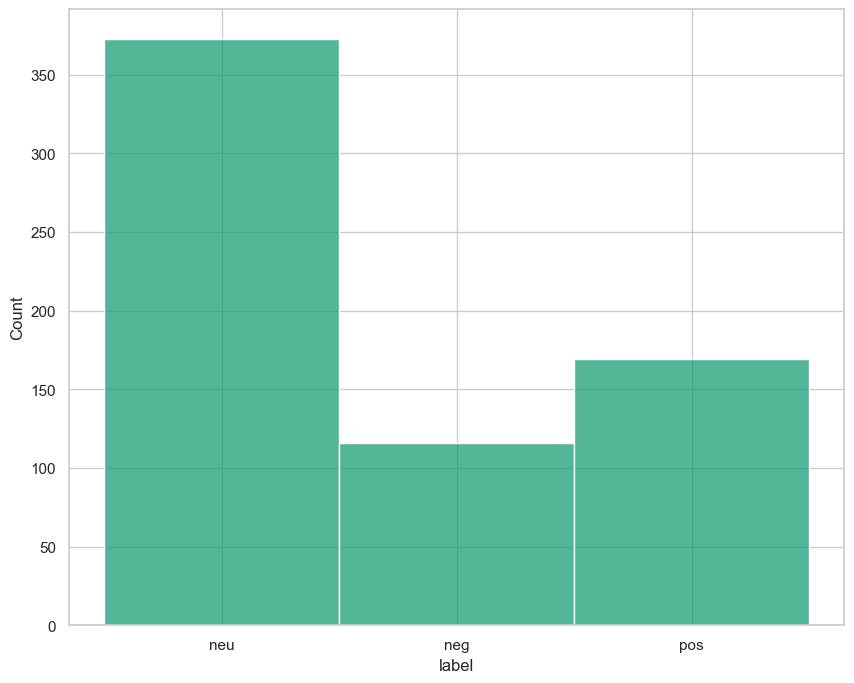

In [12]:
sns.histplot(df_vardar_results.label);

In [13]:
def results_title_output(df, label):
  res = df[df['label'] == label].title.values
  print(f'{"=" * 20}')
  print("\n".join(title for title in res))

# randomly sample
results_sub = df_vardar_results.groupby('label').sample(n = 5, random_state = 7)

print("Positive news")
results_title_output(results_sub, "pos")

print("\nNeutral news")
results_title_output(results_sub, "neu")

print("\nNegative news")
results_title_output(results_sub, "neg")

Positive news
Unwanted laptop desk on Amazon, any way I can return it cost effectively?
Would like opinions on this offer I got on my parents home
Grants, loans, and advice for getting my Real Estate career started?
Are there good calculators to find the cost of building a house?
Another, is it time to buy or wait post. While talking with a realtor they told me to wait till after the election, but even with the possibility of housing prices falling I like my odds now. So.......

Neutral news
About Condo/House prices
Does it make sense to buy a house
Another “How much house…” post (constructing custom home & with numbers)
How does the house price/rent ratio in the US compare globally?
Cottage Renovation Advice

Negative news
What should I expect to pay for my build?
I am in a unique home buying situation and I am unsure how to approach this
What are the options for unloading a house priced below market, but no buyers, without taking a credit hit?
Should I get loans out for college even 

In [14]:
# Stop words and tokenisation 
stop_words = stopwords.words('english')
print(len(stop_words))
print(stop_words[:10])

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [15]:
# Tokenisation function 
def custom_tokenize(text):
  # remove single quote and dashes
  text = text.replace("'", "").replace("-", "").lower()

  # split on words only
  tk = nltk.tokenize.RegexpTokenizer(r'\w+')
  tokens = tk.tokenize(text)

  # remove stop words
  words = [w for w in tokens if not w in stop_words]
  return words


In [16]:
# convert results to words
def tokens_2_words(df, label):
  # subset titles based on label
  titles = df[df['label'] == label].title
  # apply our custom tokenize function to each title
  tokens = titles.apply(custom_tokenize)
  # join nested lists into a single list
  words = list(chain.from_iterable(tokens))
  return words

pos_words = tokens_2_words(df_vardar_results, 'pos')
neg_words = tokens_2_words(df_vardar_results, 'neg')

In [17]:
# Top 20 positive words
pos_freq = nltk.FreqDist(pos_words)
pos_freq.most_common(20)

[('house', 77),
 ('prices', 48),
 ('price', 38),
 ('interest', 29),
 ('buy', 27),
 ('housing', 25),
 ('building', 23),
 ('home', 23),
 ('cost', 15),
 ('rate', 15),
 ('rates', 14),
 ('would', 13),
 ('land', 13),
 ('new', 13),
 ('best', 12),
 ('help', 11),
 ('build', 11),
 ('much', 11),
 ('increase', 10),
 ('better', 10)]

In [18]:
# Top 20 negative words
neg_freq = nltk.FreqDist(neg_words)
neg_freq.most_common(20)

[('house', 57),
 ('prices', 48),
 ('price', 24),
 ('housing', 21),
 ('buy', 12),
 ('drop', 10),
 ('would', 10),
 ('building', 10),
 ('home', 9),
 ('low', 9),
 ('cost', 8),
 ('high', 8),
 ('pay', 7),
 ('market', 6),
 ('rates', 6),
 ('property', 6),
 ('debt', 6),
 ('recession', 5),
 ('insane', 5),
 ('crash', 5)]

In [19]:
def plot_word_cloud(words, colormap, stopwords = [], max_words = 100):
  text = " ".join(word for word in words)
  # generate word cloud 
  wordcloud = WordCloud(width=1000, height = 600,
                        max_words = max_words,
                        colormap=colormap,
                        stopwords = stopwords,
                        background_color="black").generate(text)

  # Display the generated image:
  plt.figure( figsize=(20,10), facecolor='k' )
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off");

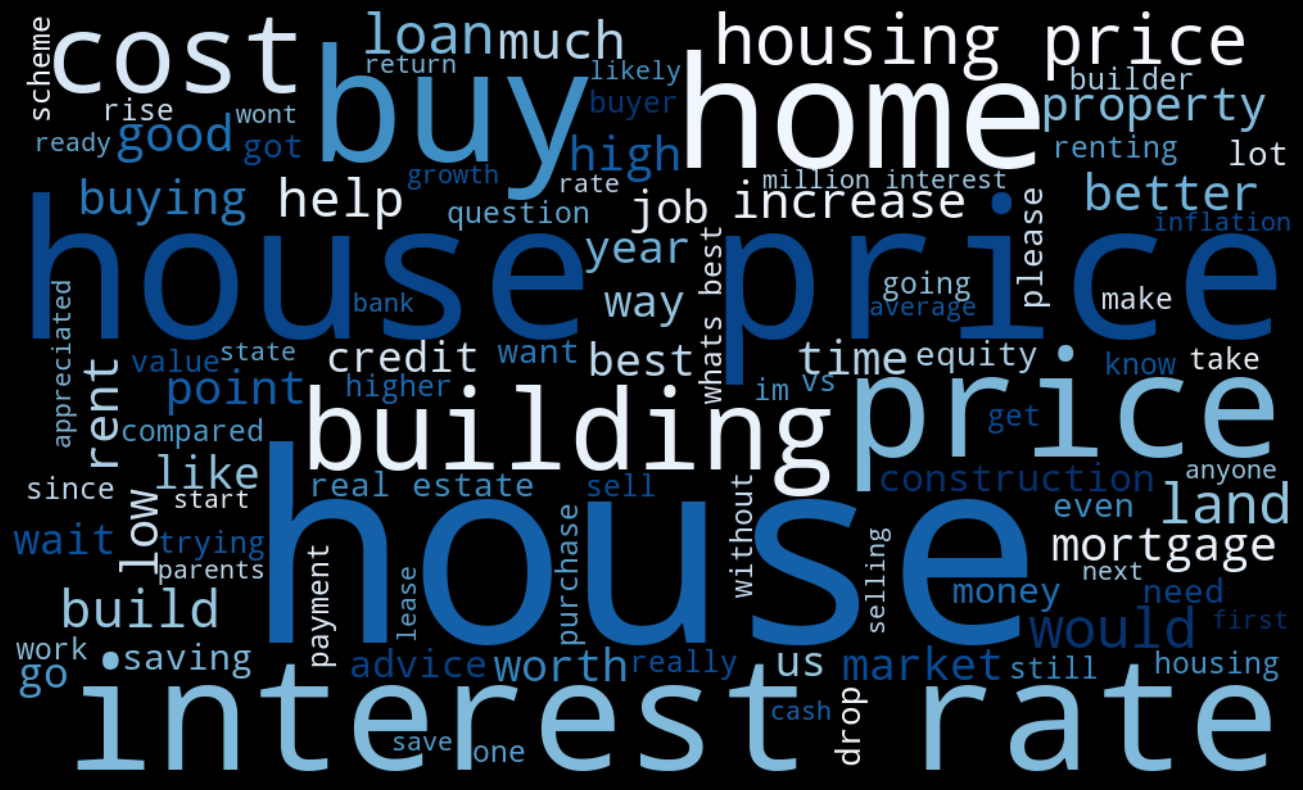

In [20]:
custom_stopwords = ["new", "could", "say", "says"]
plot_word_cloud(pos_words, "Blues", custom_stopwords)

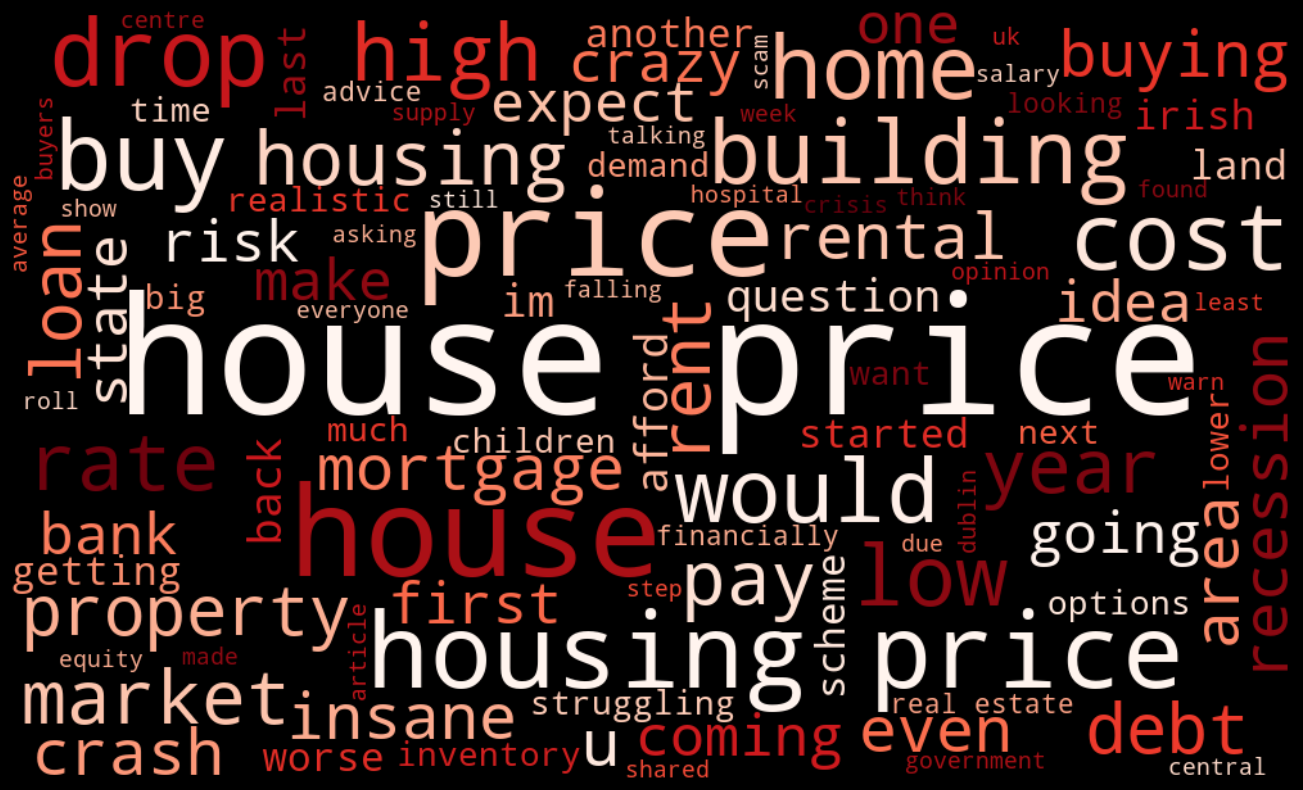

In [21]:
plot_word_cloud(neg_words, "Reds", custom_stopwords)

In [23]:
# let's test vardars accurancy on a subset of the data, 
# This json file was annotated manually to include a neu, neg or pos label based on how i perceived the reddit titles. Vardar should match this.
def format_output(output_dict):
  
  polarity = "neu"

  if(output_dict['compound'] >= 0.05):
    polarity = "pos"

  elif(output_dict['compound'] <= -0.05):
    polarity = "neg"

  return polarity


def predict_sentiment(text):
  
  output_dict =  sid.polarity_scores(text)
  return format_output(output_dict)

df_vardar_accuracy = pd.read_json('annotated_json.json').T
df_vardar_accuracy["vader_prediction"] = df_vardar_accuracy["title"].apply(predict_sentiment)

In [24]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(df_vardar_accuracy['label'], df_vardar_accuracy['vader_prediction'])

print("Accuracy: {}\n".format(accuracy))

# Show the classification report
print(classification_report(df_vardar_accuracy['label'], df_vardar_accuracy['vader_prediction']))

Accuracy: 0.6

              precision    recall  f1-score   support

         neg       0.86      0.53      0.66        47
         neu       0.62      0.74      0.67        43
         pos       0.16      0.30      0.21        10

    accuracy                           0.60       100
   macro avg       0.55      0.53      0.51       100
weighted avg       0.69      0.60      0.62       100



Machine Learning

In [25]:
# Training Set
import random

In [26]:
analyzer = SentimentIntensityAnalyzer()

def get_features(text):
    features = {}

    # Feature #1 - verbosity
    features['verbosity'] = len(text)
#If the VADER score for a review has a positive intensity, 
#we’d expect that to match the value a human identified for positive reviews.
#We can add this score as a feature in our model and run the training again.
    scores = analyzer.polarity_scores(text)
    features['vader(pos)'] = scores['pos']
    features['vader(neg)'] = scores['neg']

    return features

In [27]:
# We are going to use our annotated json as a training model 

In [28]:
#Clean data 

import string
from nltk.stem import PorterStemmer
# Store the string.punctuation into an object punct
punct = string.punctuation

# Initialise an object using a method PorterStemmer
stemmer = PorterStemmer()

In [29]:
# Create a json file with the vardar score as an attribute, We will annotate this json file with a label of neu, neg or pos outside the main object. 
# You would expect this to correspond to the vardar score.
# We will use 100 reddit posts for our dataset. 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import json

results2 = {}

analyzer = SentimentIntensityAnalyzer()
count = 0

for result in results:
    score = analyzer.polarity_scores(result.title)
    results2[result.id] = {
        'score': score,
        'up_down_score': result.score,
        'created': result.created_utc,
        'title': result.title,
        'text' : result.selftext
    }
    count += 1
    if count == 100:
        break


# Store results in a file for annotation
filename = 'test.json'
with open(filename, 'w') as file:
    json.dump(results2, file, indent=4)

In [30]:
def get_labeled_dataset():
    filename = 'annotated_json.json'
    with open(filename, 'r') as file:
        annotated = json.loads(file.read())

    dataset = []
    for id in annotated:
        dataset.append((annotated[id], annotated[id]['label']))

    random.shuffle(dataset)
    return dataset

In [31]:
#Naive Bayes Classifier in NLTK, which is an easier one to understand because it simply 
# assumes the frequency of a label in the training set with the highest probability is likely the best match.

#We take all of the reviews in the dataset and label them as positive or negative using the get_labeled_dataset function 
#shown earlier. 
#We then substitute the review with a dictionary that identifies features we believe may be important, 
#such as verbosity, using the get_features function we defined above.
import nltk.classify
from nltk import NaiveBayesClassifier

def analyze_model(dataset, train_percentage=0.75):
    feature_set = [(get_features(i['title']), label) for (i, label) in dataset]
    count = int(len(feature_set) * train_percentage)
    train_set, test_set = feature_set[:count], feature_set[count:]
    classifier = NaiveBayesClassifier.train(train_set)
    classifier.show_most_informative_features(5)

    accuracy = nltk.classify.accuracy(classifier, test_set)
    errors = []
    for (i, label) in dataset[count:]:
        guess = classifier.classify(get_features(i['title']))
         
        if guess != label:
            tokens = nltk.word_tokenize(i['title'])
            errors.append((label, guess, tokens[:10]))
    return (classifier, accuracy, errors)

dataset = get_labeled_dataset()

trained_classifier, accuracy, errors = analyze_model(dataset)

Most Informative Features
              vader(neg) = 0.0               neu : pos    =      2.7 : 1.0
              vader(pos) = 0.0               neg : pos    =      1.9 : 1.0
               verbosity = 45                pos : neg    =      1.9 : 1.0
               verbosity = 72                pos : neg    =      1.9 : 1.0
               verbosity = 44                neu : neg    =      1.6 : 1.0


In [32]:
accuracy

0.4

In [33]:
# Classify the filtered posts
classified_results = []
for post in results:
    features = get_features(post.title)  # Extract features from the post title or any other relevant field
    label = trained_classifier.classify(features)
    classified_results.append((post.title, label))

In [34]:
df = pd.DataFrame(classified_results, columns=['Title', 'NaiveBayesClassifier'])
df.head(50)

Title NaiveBayesClassifier
0   Third consecutive month of house price decline...                  neu
1   First-time buyers dominate market as average h...                  neu
2   Irish house prices rise 8.9% in first three mo...                  neg
3   Crazy house prices: ‘I think it’s starting to ...                  neg
4   House Prices Continue to Fall as Borrowing Cos...                  neu
5                 Guess the house price! Daft.ie quiz                  neu
6   Rents up by 16%, house prices by 34% since 201...                  neg
7   Easing mortgage rules likely to cause ‘modest’...                  neg
8        anyone think house prices will fall in 2023?                  neu
9   Developer warns house price drop would make ne...                  neg
10  Help to Buy scheme may be fuelling house price...                  neu
11  Realistic housing prices across Ireland - Excl...                  neg
12      Some very reasonable house prices in Shankill                  neu
13  Rising rates could knock €20,000 off house prices                  neu
14  How EU made a fundamental error when determini...                  neg
15  Smaller back gardens could reduce new house pr...                  neu
16       anyone else noticing house prices dropping ?                  neu
17  With talks of €7.45 for a chicken fillet roll,...                  neu
18  UK house prices predicted to drop by at least ...                  pos
19  Average Irish person when house prices had jus...                  neg
20          house prices - how over valued are they ?                  neu
21  Just to show how bonkers house prices are in D...                  neg
22  The Covid-induced surge in house prices has re...                  pos
23  €35, 000 increase in house price since January...                  pos
24  Irish House Price Report Q1 2022 - The average...                  neu
25  Help to Buy scheme did not cause house prices ...                  neu
26  Any decrease in house prices brought on by an ...                  neg
27       Salaries and Average House Prices in Ireland                  neu
28  There have been 92k properties built in the la...                  neg
29  Irish house prices up almost 11%, says MyHome....                  neg
30  Dublin house prices rise by 3.4% with average ...                  neg
31  First-time buyers need deposits of €52,500 as ...                  neg
32                             Expensive house prices                  neu
33  Everyone talking about the crazy house prices....                  neg
34  Strong house price growth likely to continue f...                  neg
35  Covid-induced surge in house prices has reache...                  neg
36  With house prices generally going for at least...                  neg
37  “Officials at the Dept of Finance warned that ...                  neg
38                 Are house prices ever coming down?                  neg
39  I know some people say [the shared equity sche...                  neu
40                   Is a housing price crash coming?                  neg
41           Concerning house prices and mobile homss                  neg
42              Opinion: House prices aren’t falling.                  neg
43   IMF urges caution as house prices surge globally                  neg
44  Dublin house prices to soar by 25 per cent, co...                  neg
45  Another house rant, But we are getting shafted...                  neu
46  Senator Garret Ahearn epitomises the governmen...                  neu
47    Irish house prices surge 13% due to weak supply                  neg
48  Tough week for Darragh O’Brien’s Shared Equity...                  pos
49  I plotted the culminative % data for wages, in...                  neu

In [35]:
# Bag of words vectorizer sentimental analysis 

In [36]:
df_annotated = pd.read_json('annotated_json.json').T

In [37]:
df_annotated

score up_down_score  \
13jyrhv  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...            41   
124fmjq  {'neg': 0.12, 'neu': 0.88, 'pos': 0.0, 'compou...           119   
13ejsvy  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...           246   
121mnfo  {'neg': 0.156, 'neu': 0.844, 'pos': 0.0, 'comp...           116   
1253s1q  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...            14   
...                                                    ...           ...   
y8fkla   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...            29   
wb60pg   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...            18   
zmgkbw   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...             0   
wkhrb6   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...             1   
xu0zon   {'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'comp...             0   

              created                                              title  \
13jyrhv  1684322163.0  Third consecutive month of house price decline...   
124fmjq  1679984962.0  First-time buyers dominate market as average h...   
13ejsvy  1683802431.0  Irish house prices rise 8.9% in first three mo...   
121mnfo  1679752715.0  Crazy house prices: ‘I think it’s starting to ...   
1253s1q  1680040637.0  House Prices Continue to Fall as Borrowing Cos...   
...               ...                                                ...   
y8fkla   1666216419.0  Builders should not decide housing locations, ...   
wb60pg   1659104295.0  [Update] State to sink another €450m into leas...   
zmgkbw   1671094804.0        Ba cheart d’Éirinn Corn an Domhain a óstáil   
wkhrb6   1660087080.0                          Cottage Renovation Advice   
xu0zon   1664747550.0  Genuine question, in your opinion, where is th...   

                                                      text label  
13jyrhv                                                      pos  
124fmjq                                                      neu  
13ejsvy                                                      neg  
121mnfo                                                      neg  
1253s1q  Source: OECD (link in comments) \n\nDo you thi...   neu  
...                                                    ...   ...  
y8fkla   "Mr Cussen warned against “loose talk” which m...   neu  
wb60pg   Hi All, \n\nOriginal Article:  [reddit.com/r/i...   neu  
zmgkbw   Hear me out: I know the normal the automatic r...   neu  
wkhrb6   Hey 👋 so myself and my boyfriend are looking a...   neu  
xu0zon   Obviously a lot of factors come into play when...   neu  

[100 rows x 6 columns]

In [38]:
X = df_annotated['text']

In [39]:
y = df_annotated['label']

In [40]:
# Clean the data 
import re

cleaned_data=[]

# For loop from first value to length(X), ^a-zA-Z means include small and capital case letters

for i in range(len(X)):
    post = re.sub('[^a-zA-Z]', ' ', X.iloc[i])
    post = post.lower().split()
    post = [stemmer.stem(word) for word in post if (word not in stop_words) and (word not in punct)]
    post = ' '.join(post)
    cleaned_data.append(post)

In [41]:
# Pre-Prcoessing and Bag of Word Vectorization using Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv    = CountVectorizer(stop_words = 'english',ngram_range = (1, 1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(cleaned_data)

text_counts

<100x1623 sparse matrix of type '<class 'numpy.int64'>'
	with 3314 stored elements in Compressed Sparse Row format>

In [42]:
#Splitting the data into trainig and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, y, test_size=0.25, random_state=5)

In [43]:
text_counts.shape, X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((100, 1623), (75, 1623), (25, 1623), (75,), (25,))

In [44]:
# Training the model
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

# Caluclating the accuracy score of the model
from sklearn import metrics
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print("Accuracy Score: ",accuracy_score)

Accuracy Score:  0.56


In [45]:
# TfidfVectorizer method

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an object 'tf' by calling a method TfidfVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

# Train the dataset by calling a method fit_tranform() 
X_tfidf = tfidf.fit_transform(cleaned_data).toarray()

In [47]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Instantiate an object model by calling a method MultinomialNB()
model_tdidf = MultinomialNB()

In [48]:
# Split the dataset into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.25)

In [49]:
# Train the model by calling a method fit()
model_tdidf.fit(X_train, y_train)

MultinomialNB()

In [50]:
# Call predict() method
y_pred = model_tdidf.predict(X_test)

In [51]:
from sklearn.metrics import classification_report

# Instantiate a mthod named as Cla
cf = classification_report(y_test, y_pred)

# Display the values of an object cf
print(cf)


              precision    recall  f1-score   support

         neg       0.00      0.00      0.00        14
         neu       0.32      1.00      0.48         8
         pos       0.00      0.00      0.00         3

    accuracy                           0.32        25
   macro avg       0.11      0.33      0.16        25
weighted avg       0.10      0.32      0.16        25



/Users/seankearney/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/seankearney/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/seankearney/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
accuracy_score = metrics.accuracy_score(y_pred, y_test)
print("Accuracy Score: ",accuracy_score)

Accuracy Score:  0.32


In [53]:
# Logistical Regression 
df_log = df_annotated

In [54]:
df_log

score up_down_score  \
13jyrhv  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...            41   
124fmjq  {'neg': 0.12, 'neu': 0.88, 'pos': 0.0, 'compou...           119   
13ejsvy  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...           246   
121mnfo  {'neg': 0.156, 'neu': 0.844, 'pos': 0.0, 'comp...           116   
1253s1q  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...            14   
...                                                    ...           ...   
y8fkla   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...            29   
wb60pg   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...            18   
zmgkbw   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...             0   
wkhrb6   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...             1   
xu0zon   {'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'comp...             0   

              created                                              title  \
13jyrhv  1684322163.0  Third consecutive month of house price decline...   
124fmjq  1679984962.0  First-time buyers dominate market as average h...   
13ejsvy  1683802431.0  Irish house prices rise 8.9% in first three mo...   
121mnfo  1679752715.0  Crazy house prices: ‘I think it’s starting to ...   
1253s1q  1680040637.0  House Prices Continue to Fall as Borrowing Cos...   
...               ...                                                ...   
y8fkla   1666216419.0  Builders should not decide housing locations, ...   
wb60pg   1659104295.0  [Update] State to sink another €450m into leas...   
zmgkbw   1671094804.0        Ba cheart d’Éirinn Corn an Domhain a óstáil   
wkhrb6   1660087080.0                          Cottage Renovation Advice   
xu0zon   1664747550.0  Genuine question, in your opinion, where is th...   

                                                      text label  
13jyrhv                                                      pos  
124fmjq                                                      neu  
13ejsvy                                                      neg  
121mnfo                                                      neg  
1253s1q  Source: OECD (link in comments) \n\nDo you thi...   neu  
...                                                    ...   ...  
y8fkla   "Mr Cussen warned against “loose talk” which m...   neu  
wb60pg   Hi All, \n\nOriginal Article:  [reddit.com/r/i...   neu  
zmgkbw   Hear me out: I know the normal the automatic r...   neu  
wkhrb6   Hey 👋 so myself and my boyfriend are looking a...   neu  
xu0zon   Obviously a lot of factors come into play when...   neu  

[100 rows x 6 columns]

In [55]:
X_train = df_log['title'].values[:51]
y_train = df_log['label'].values[:51]
X_test = df_log['title'].values[51:]
y_test = df_log['label'].values[51:]

In [56]:
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()

def tokenizer(text):
    return text.split()


def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None)

param_grid = [{'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop_words, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              {'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop_words, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'vect__use_idf':[False],
               'vect__norm':[None],
               'clf__penalty': ['l1','l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              ]

lr_tfidf = Pipeline([('vect', tfidf),
                     ('clf', LogisticRegression(random_state=0))])

gs_lr_tfidf = GridSearchCV(lr_tfidf, param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

In [58]:
gs_lr_tfidf.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/Users/seankearney/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', "it'", 'onc', 'onli', 'ourselv', "she'", "should'v", 'themselv', 'thi', 'veri', 'wa', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  warnings.warn(
/Users/seankearney/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', "it'", 'onc', 'onli', 'ourselv', "she'", "should'v", 'themselv', 'thi', 'veri', 'wa', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  warnings.warn(
/Users/seankearney/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your sto

/Users/seankearney/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', "it'", 'onc', 'onli', 'ourselv', "she'", "should'v", 'themselv', 'thi', 'veri', 'wa', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  warnings.warn(
/Users/seankearney/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', "it'", 'onc', 'onli', 'ourselv', "she'", "should'v", 'themselv', 'thi', 'veri', 'wa', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  warnings.warn(
/Users/seankearney/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your sto

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(lowercase=False)),
                                       ('clf',
                                        LogisticRegression(random_state=0))]),
             n_jobs=-1,
             param_grid=[{'clf__C': [1.0, 10.0, 100.0],
                          'clf__penalty': ['l1', 'l2'],
                          'vect__ngram_range': [(1, 1)],
                          'vect__stop_words': [['i', 'me', 'my', 'myself', 'we',
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'll", "you'd",...
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'll", "you'd", 'your',
                                                'yours', 'yourself',
                                                'yourselves', 'he', 'him',
                                                'his', 'himself', 'she',
                                                "she's", 'her', 'hers',
                                                'herself', 'it', "it's", 'its',
                                                'itself', ...],
                                               None],
                          'vect__tokenizer': [<function tokenizer at 0x7fe6556c45e0>,
                                              <function tokenizer_porter at 0x7fe6556c4670>],
                          'vect__use_idf': [False]}],
             scoring='accuracy', verbose=1)

In [59]:
print('Best parameter set: %s ' % gs_lr_tfidf.best_params_)
print('CV Accuracy: %.3f' % gs_lr_tfidf.best_score_)

Best parameter set: {'clf__C': 1.0, 'clf__penalty': 'l2', 'vect__ngram_range': (1, 1), 'vect__stop_words': ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each',

In [60]:
clf = gs_lr_tfidf.best_estimator_
print('Test Accuracy: %.3f' % clf.score(X_test, y_test))

Test Accuracy: 0.265
